# Capstone Project
## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the <b>rating</b> *also* makes money by <b>selling</b> movie tickets. In October 2015, Walt Hickey from 538 published a popular article from the website html code he determine the fandango website is biased in showing the true ‘RatingValue’ and inflating the rounding up instead of rounding down.

### Goal:

**My Goal is determine how can we determine if Fandango’s website rating in 2015 had a bias approach towards rating to sell more tickets by comparing the rating of same movies on other websites! With the help of data analysis in python based off the 538 article and data provided in data.world,github.we will see if we reach a similar conclusion. We will also try to find hows the ratingValues of movies differ in 2016.**


Question we are trying to Answer here is : 

1) Is there conflict of interest for a <b>website</b> that both sells movie tickets and display <b>review ratings</b>?

2) Does a website like Fandango artifically display higher review ratings to sell more movie tickets?

3) In 2016 the Fandango acquired Rotten tomatoes, we will see if the comapny is making same biasness in maitaining the rating Values of movie in 2016. 










### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.


#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

 **Import any libraries you think you will use:**

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pwd

 So what we are doing here, A person visits the website and votes means person reviews a movie. 
 While voting he actually gives a rating thats what transformed to the STARS in the fandango website. 
 We need to see if there is descrepency between the RATING given by voters and STARs shown on the website.

 ## Exploring Fandango Website Scores versus True User Ratings

Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

Run the cell below to read in the fandango_scrape.csv file**

In [99]:
fandango = pd.read_csv("fandango_scrape.csv")


<font color='green'><b>Explore the DataFrame Properties and Head.</b></font>

In [100]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [105]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [106]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [107]:
fandango.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES'], dtype='object')

<font color='green'><b>
We have 504 entries in the fandando dataset.With the column name FILM(Movie Name), STARS(Critic Rating),RATING(User Rating), VOTES(Total number of vote count user ave submitted).
</b></font>


<font color='green'><b>
Let's explore the relationship between popularity of a film and its rating. Lets create a scatterplot showing the relationship between rating and votes
</b></font>



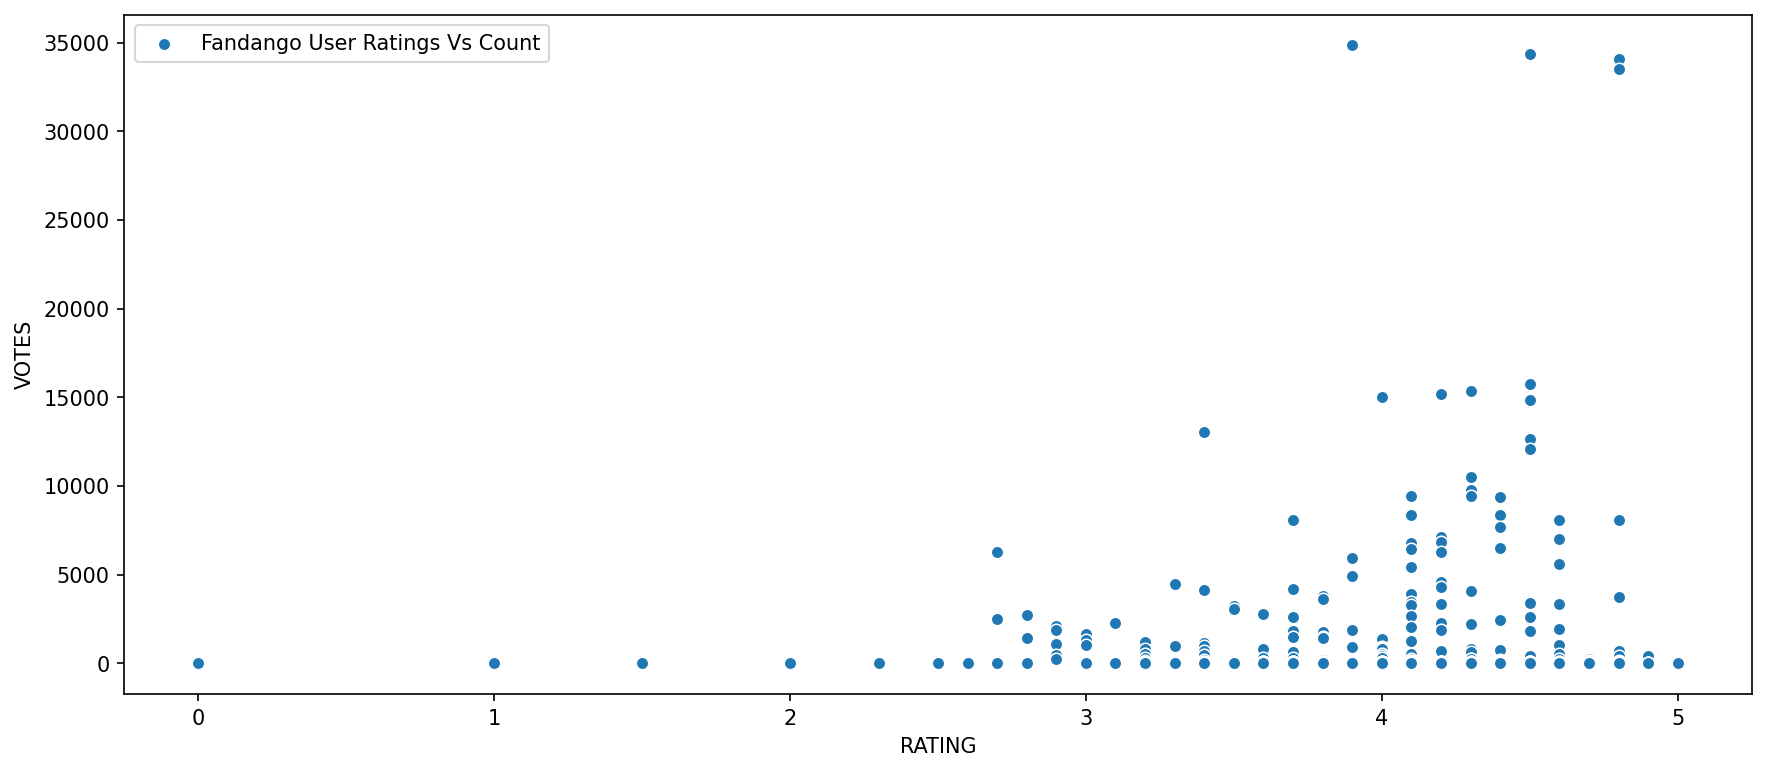

In [108]:
plt.figure(figsize=(14,6),dpi=150)
sns.scatterplot(x='RATING',y='VOTES',data=fandango,label='Fandango User Ratings Vs Count')
plt.legend()
plt.show()


<font color='green'><b>
We see mostly users are giving rating between 3 and 5 even in smaller vote counts.
</b></font>


<font color='green'><b>
**We have also Calculate the correlation between the columns:**
</b></font>

In [109]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


<font color='green'><b>
corr() will show up the corelation between every numerical columns in the dataframe. And what we see here is that 'Rating' and 'Star' is not not perfectly corelated.There is a difference between them. We need to figure that out.
</b></font>

<font color='blue'><b>
** Assuming that every row in the FILM title column has the same format:**
   Film Title Name (Year)
</b></font>    
    

<font color='green'><b>
**Lets create new column that is able to strip the year from the title strings and set this new column as YEAR**
</b></font> 





In [110]:
title='Film Title Name (Year)'
title.split('(')[-1].replace(')','')

'Year'

In [111]:
fandango['YEAR']=fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')',''))
#Keep in mind that this YEAR column in of string type.fan

In [112]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
 4   YEAR    504 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 19.8+ KB


**Lets see how many movies are in the Fandango DataFrame per year?**

In [113]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2012      1
1964      1
2016      1
Name: YEAR, dtype: int64



<font color='green'><b>
**Lets Visualize the count of movies per year with a plot:**
</b></font> 

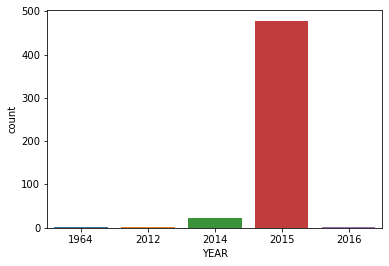

In [114]:
sns.countplot(data=fandango,x='YEAR')


<font color='green'><b>
Desecending order 
</b></font> 

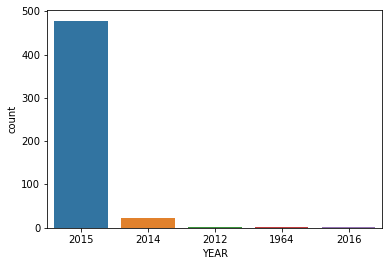

In [115]:
sns.countplot(data=fandango,x='YEAR',order = fandango['YEAR'].value_counts().index)



<font color='green'><b>
**Lets see 10 movies with the highest number of votes**
</b></font> 

In [116]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


<font color='green'><b>
**Lets see how many movies have zero votes?**
</b></font>

In [117]:
sum(fandango['VOTES']==0)

# len(fandango[fandango['VOTES']==0])

69

<font color='green'><b>
**Create DataFrame of only reviewed films by removing any films that have zero votes.**
</b></font>

In [118]:
fan_reviewed=fandango[fandango['VOTES']>0]

In [119]:
fan_reviewed  # This Dataframe includes the entries where there are NO Zero votes.  votes > 0

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


In [120]:
fan_reviewed['STARS'].value_counts()

4.0    126
4.5    107
5.0     92
3.5     57
3.0     45
2.0      4
1.0      3
2.5      1
Name: STARS, dtype: int64

In [121]:
fan_reviewed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    435 non-null    object 
 1   STARS   435 non-null    float64
 2   RATING  435 non-null    float64
 3   VOTES   435 non-null    int64  
 4   YEAR    435 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 20.4+ KB


<font color='green'><b>
**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

**Lets Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING).(Clip the KDEs to 0-5).**
</b></font>


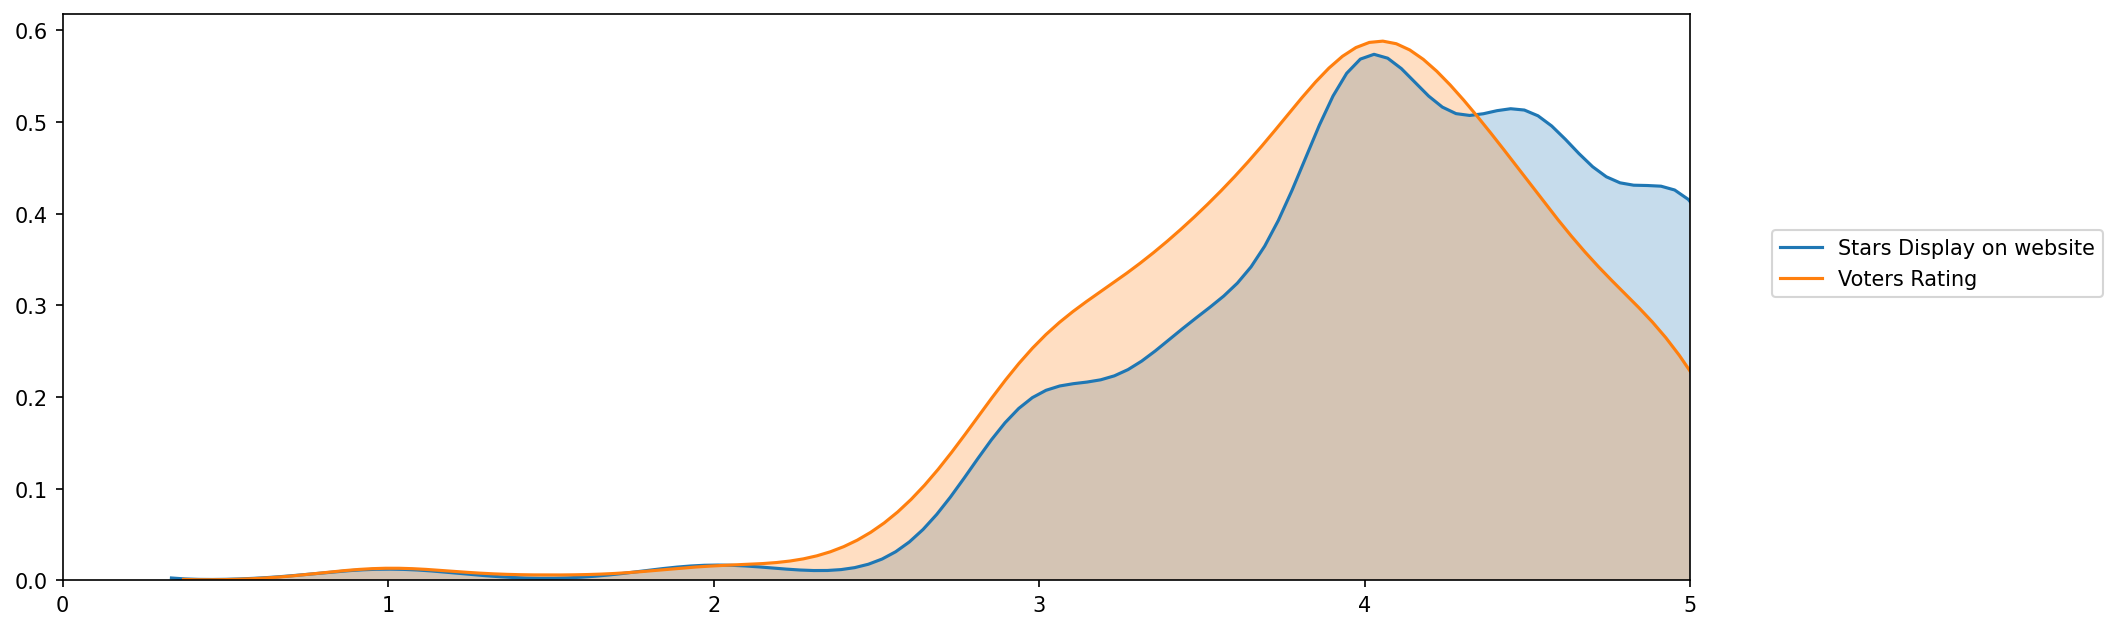

In [122]:
# to kdeplot() --- 1d array like you can pass LIST,SERIES,NUMPY array
# we will make two simple KDE plots.
plt.figure(figsize=(14,5),dpi=150)

sns.kdeplot(fan_reviewed['STARS'],shade=True,label='Stars Display on website')
sns.kdeplot(fan_reviewed['RATING'],shade=True,label='Voters Rating')
plt.legend(loc=(1.05,0.5))
plt.xlim(0,5)
plt.show();


<font color='green'><b>
Distribution between the Website Rating and User Rating shows us how the Website Rating is centralized  more towards the right side showing highier rating end compare to user rating
</b></font>


<font color='green'><b>
**Let's now actually quantify this discrepancy. Create a new column of the different between STARS displayed versus true RATING. Calculate this difference with STARS-RATING and round these differences to the nearest decimal point.**
</b></font>

In [123]:
fan_reviewed['STARS_DIFF']=fan_reviewed['STARS'] - fan_reviewed['RATING'] 

<ipython-input-123-5c38a9861f54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF']=fan_reviewed['STARS'] - fan_reviewed['RATING']


In [124]:
fan_reviewed['STARS_DIFF']=fan_reviewed['STARS_DIFF'].round(2)

<ipython-input-124-025e8d75d25d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF']=fan_reviewed['STARS_DIFF'].round(2)


In [125]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0



<font color='green'><b>
**Create a count plot to display the number of times a certain difference occurs:**
</b></font>


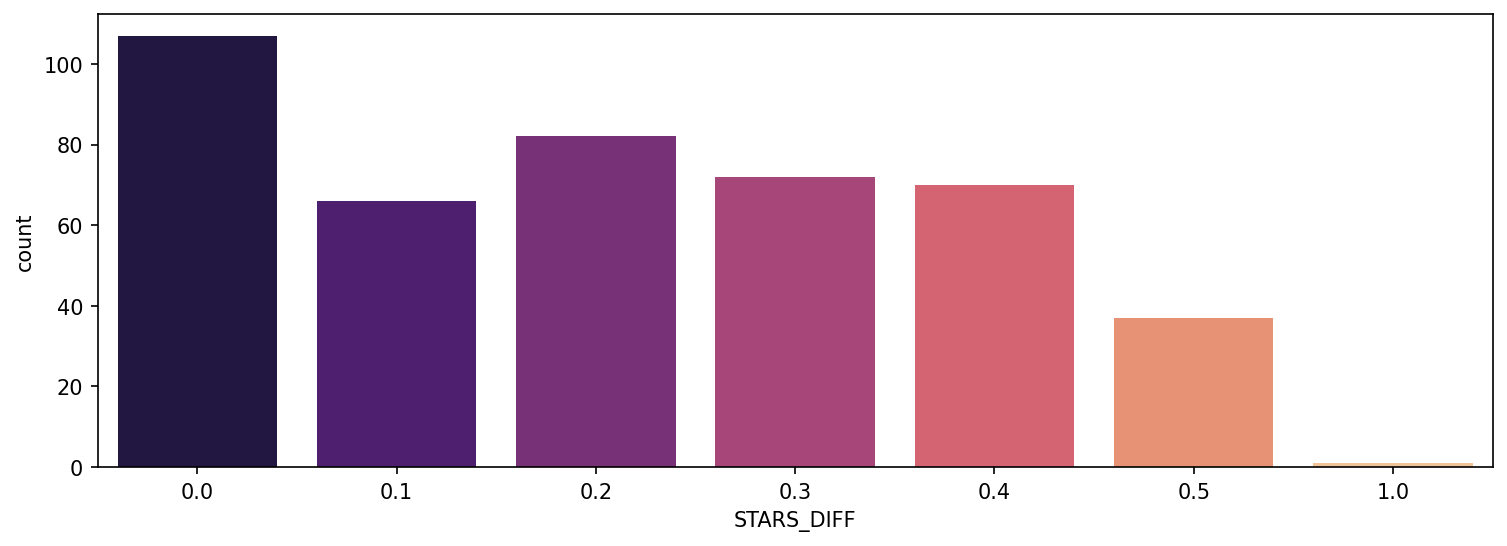

In [126]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=fan_reviewed,x='STARS_DIFF',palette='magma')


# How to read this: 
# So there are over 100 reviews where the rating difference is 0
# But there difference of rating with max of one star thats crazy!!

<font color='green'><b>
**We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?**
</b></font>


In [127]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [128]:
fan_reviewed.to_excel(r'C:\Users\renud\2021 Python DataScience\UNZIP_ME_FOR_NOTEBOOKS\06-Capstone-Project\Tableau_files_here\fan_reviewed.xlsx')

## Comparison of Fandango Ratings to Other Sites


<font color='green'><b>
Let's now compare the scores from Fandango to other movies sites and see how they compare.
Read in the "all_sites_scores.csv" file by running the cell below.
</b></font>





In [131]:
all_sites = pd.read_csv("all_sites_scores.csv")

<font color='green'><b>
Explore the DataFrame columns, info, description.
</b></font>


In [132]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [133]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

In [134]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [135]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes
<font color='green'><b>



Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**Lets Create a scatterplot exploring the relationship between RT Official Critic reviews and RT User reviews.**
</b></font>    

(0.0, 100.0)

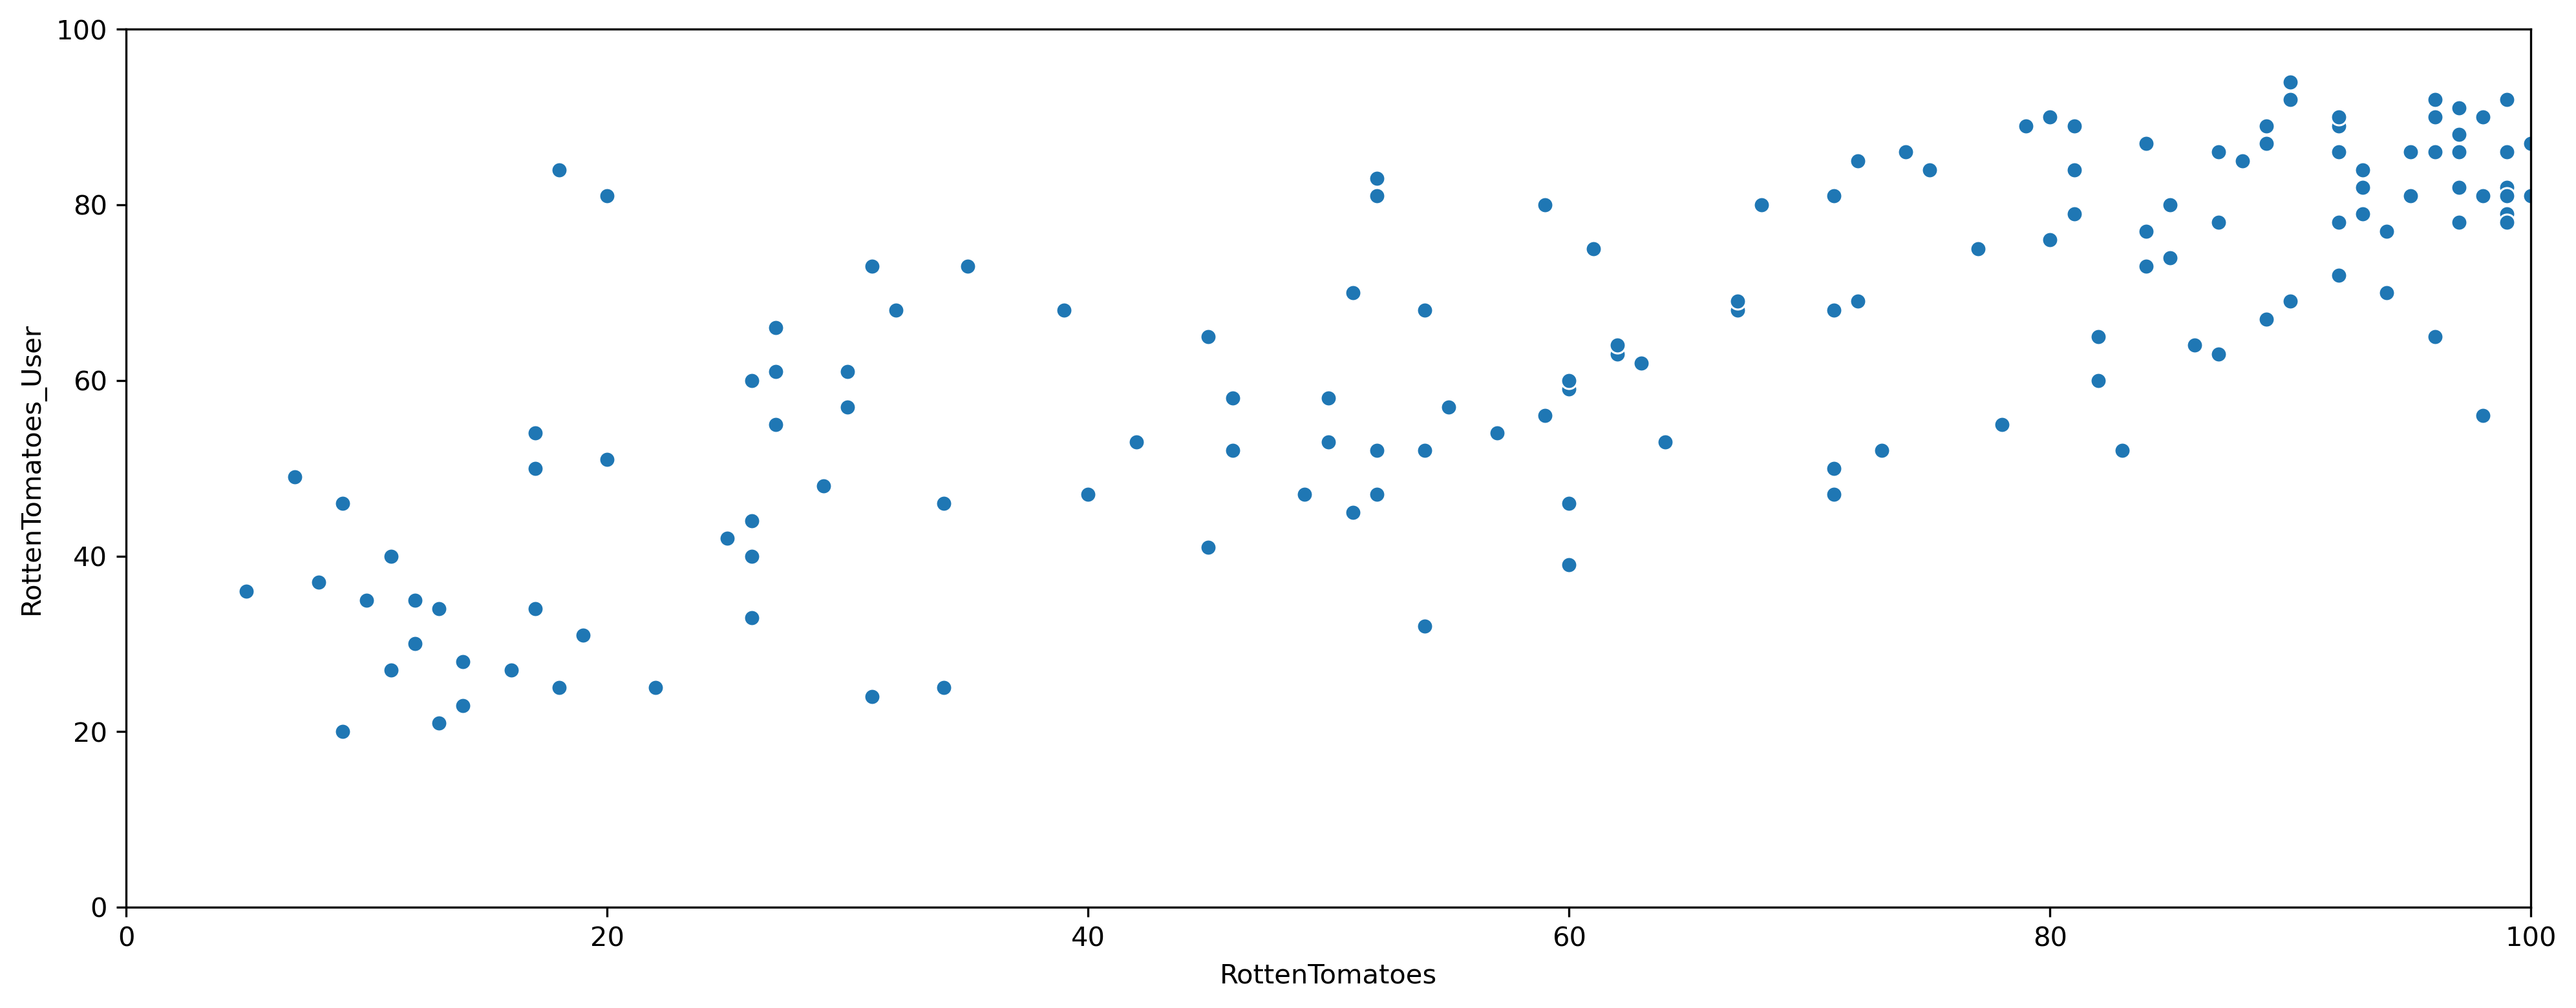

In [226]:
plt.figure(figsize=(16,6),dpi=300)


sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')


# In an avg, the users liked the movies more than the critics. Infact two movies can be seen as outliers where movie was liked 
# by user but not by critic and vice versa.

plt.xlim(0,100)
plt.ylim(0,100)


<font color='green'><b>
Let's quantify this difference by comparing the critics review and  User reviews.
Note: 
Rotten_Diff here is (Critics - User Score). So values closer to 0 means aggrement between Critics and Users. 
Larger positive values means critics rated much higher than users. 
Larger negative values means users rated much higher than critics.


</b></font>

In [137]:
all_sites['Rotten_Diff']=all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']
all_sites['Rotten_Diff']=all_sites['Rotten_Diff'].round(2)

In [227]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

**TASK: Calculate the Mean Absolute Difference between RT scores and RT User scores as described above.**

In [138]:
all_sites['Rotten_Diff'].apply(abs).mean()  # call abs under apply and then calculate the mean.

15.095890410958905

This is absolute difference in rating between Rotten tomatoes critics and Rotten tomatoes User

**Lets Plot the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot.**

In [139]:
all_sites['Rotten_Diff']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Rotten_Diff, Length: 146, dtype: int64

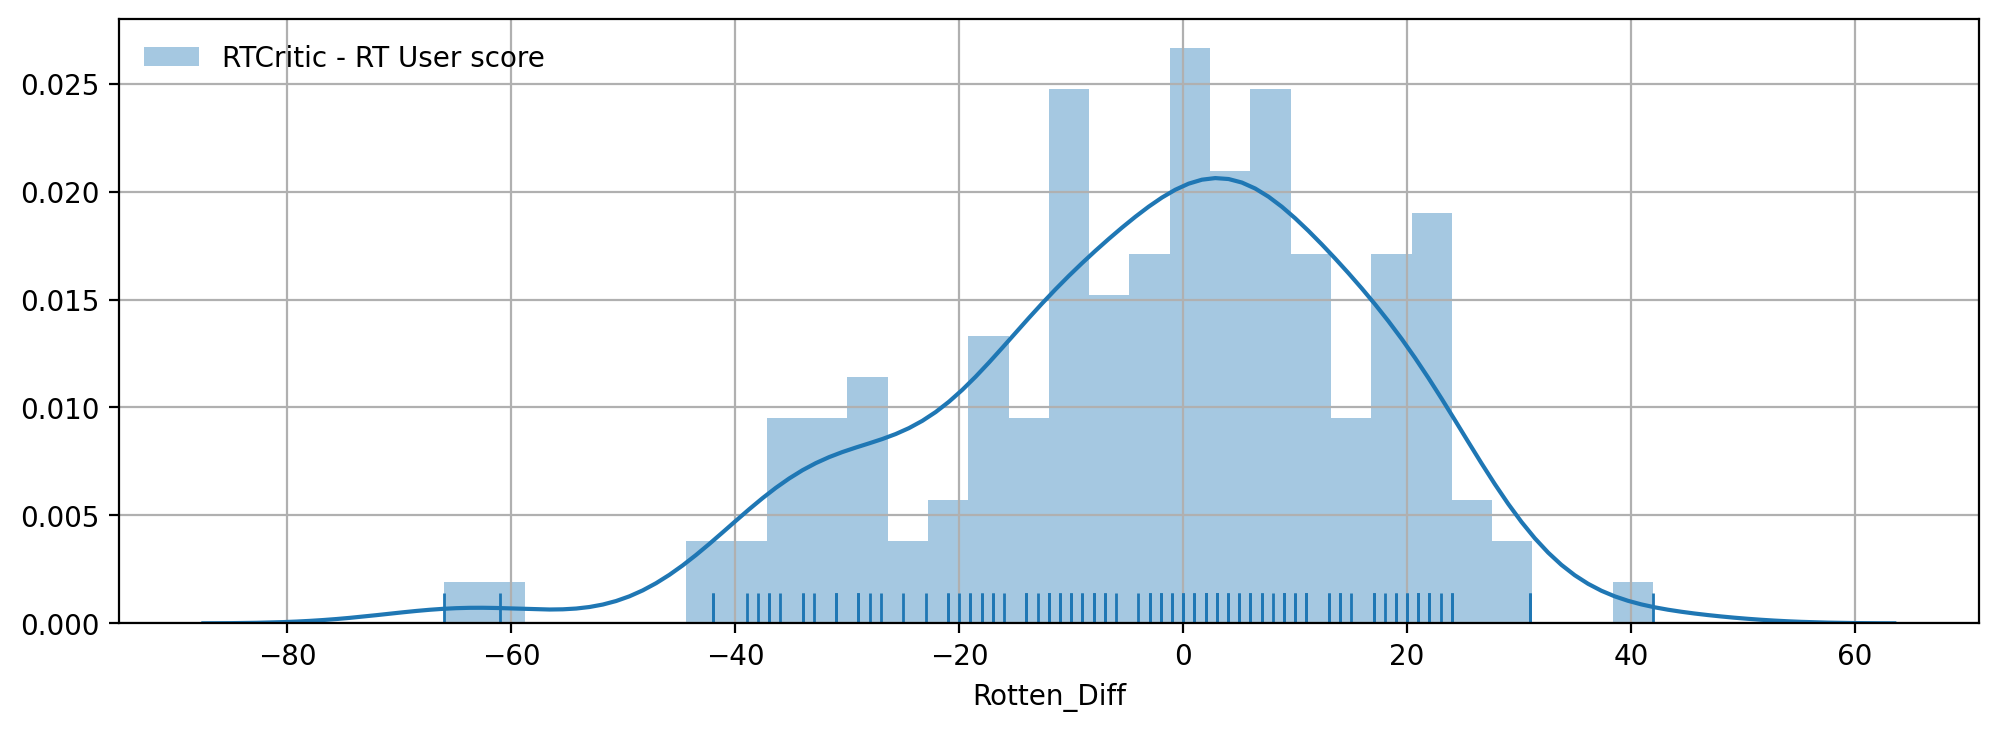

In [140]:
plt.figure(figsize=(12,4),dpi=200)
sns.distplot(a=all_sites['Rotten_Diff'],bins=30,kde=True,rug=True,label='RTCritic - RT User score')
plt.legend(loc='upper left',frameon=False)
plt.grid(True)


**Now create a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

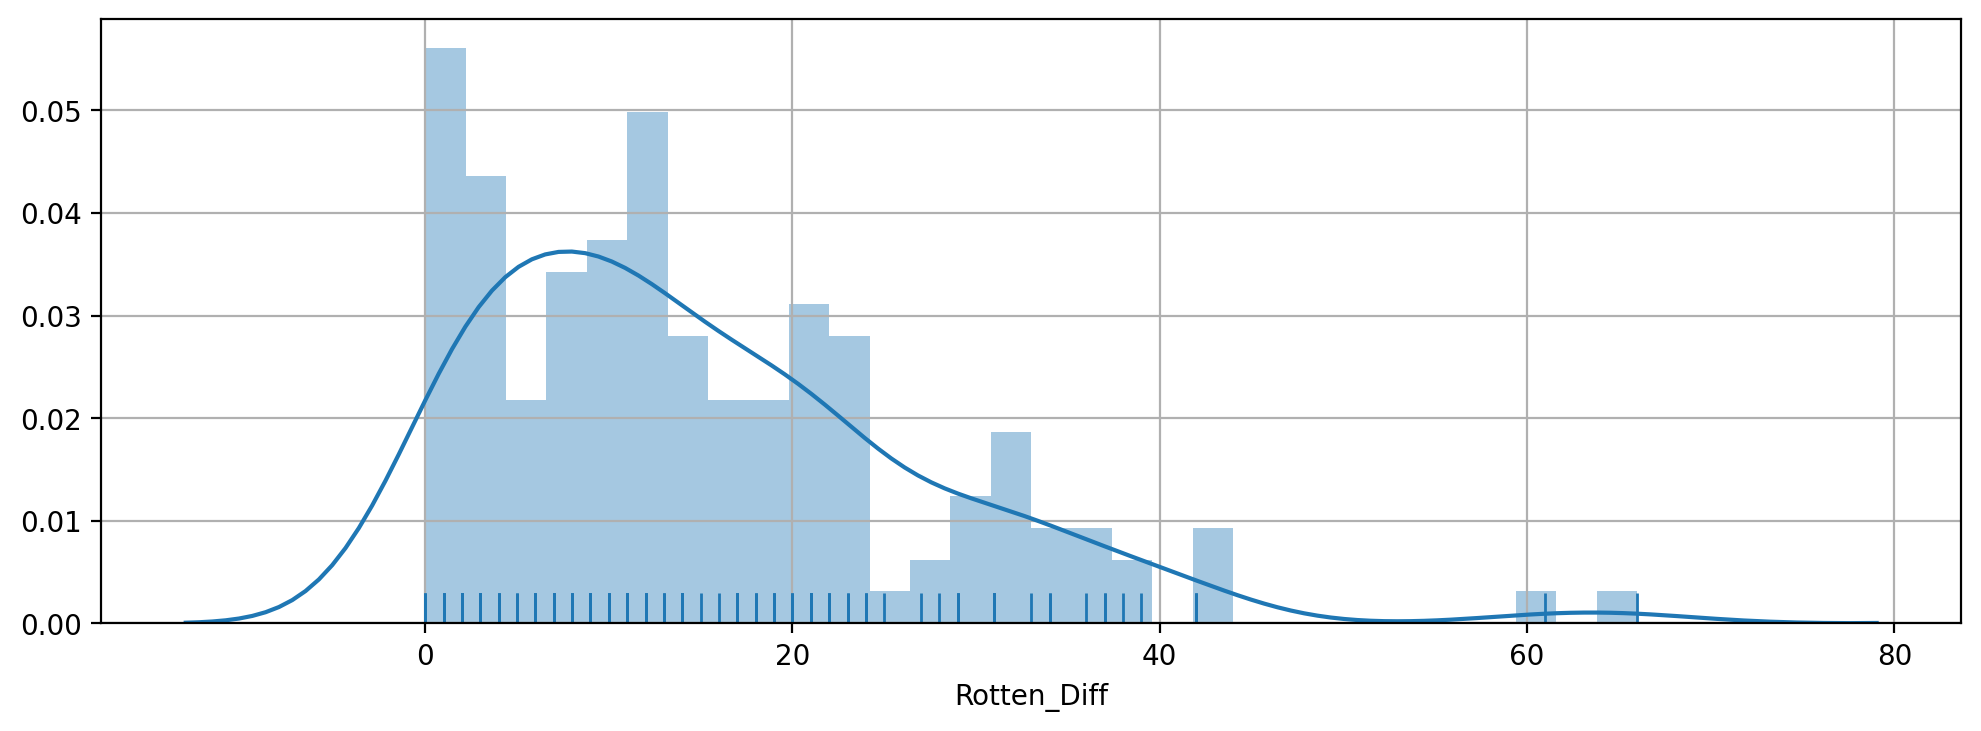

In [141]:
plt.figure(figsize=(12,4),dpi=200)
sns.distplot(a=all_sites['Rotten_Diff'].apply(abs),bins=30,kde=True,rug=True)
plt.grid(True)

<font color='green'><b>


**Let's find out which movies are causing the largest differences. First, show the top 5 movies with the largest *negative* difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**
    
</b></font>    

<font color='green'><b>
**What are the top 5 movies users rated higher than critics on average:**
</b></font>    

In [142]:
# The Movies User loved BUt Critic hated.  user > critic
all_sites[['FILM','Rotten_Diff']]


,FILM,Rotten_Diff
0,Avengers: Age of Ultron (2015),-12
1,Cinderella (2015),5
2,Ant-Man (2015),-10
3,Do You Believe? (2015),-66
4,Hot Tub Time Machine 2 (2015),-14
...,...,...
141,Mr. Holmes (2015),9
142,'71 (2015),15
143,"Two Days, One Night (2014)",19
144,Gett: The Trial of Viviane Amsalem (2015),19


In [144]:
# user > critic. User LOVES but Critics HATES
all_sites[['FILM','RottenTomatoes','RottenTomatoes_User','Rotten_Diff']].nsmallest(5,'Rotten_Diff') 

,FILM,RottenTomatoes,RottenTomatoes_User,Rotten_Diff
3,Do You Believe? (2015),18,84,-66
85,Little Boy (2015),20,81,-61
105,Hitman: Agent 47 (2015),7,49,-42
134,The Longest Ride (2015),31,73,-42
125,The Wedding Ringer (2015),27,66,-39


** Now show the top 5 movies critics scores higher than users on average.**

In [145]:
all_sites[['FILM','RottenTomatoes','RottenTomatoes_User','Rotten_Diff']].nlargest(5,'Rotten_Diff')  # critic > user

,FILM,RottenTomatoes,RottenTomatoes_User,Rotten_Diff
69,Mr. Turner (2014),98,56,42
112,It Follows (2015),96,65,31
115,While We're Young (2015),83,52,31
37,Welcome to Me (2015),71,47,24
40,I'll See You In My Dreams (2015),94,70,24


## MetaCritic
<font color='green'><b>
Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.
</b></font>


<font color='green'><b>
**Display a scatterplot of the Metacritic website Rating versus the Metacritic User rating.**
</b></font>


(0.0, 10.0)

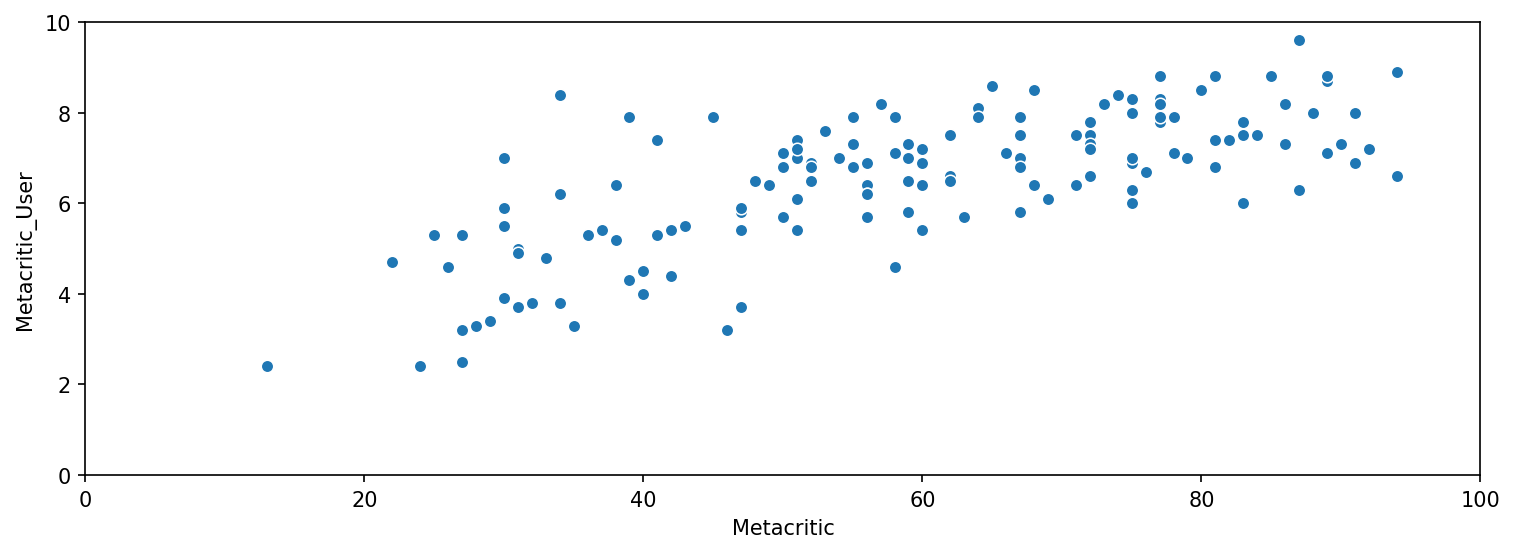

In [147]:
plt.figure(figsize=(12,4),dpi=150)
sns.scatterplot(data=all_sites,x=all_sites['Metacritic'],y=all_sites['Metacritic_User'])
plt.xlim(0,100)
plt.ylim(0,10)

# seems to be linear positive replationship. With no visible extreme outliers

<font color='green'><b>
The relationship between User and Website critic is pretty much linear. Movies have been rated almost equally by both Critic and users on metacritic.
</b></font>

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**Lets create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

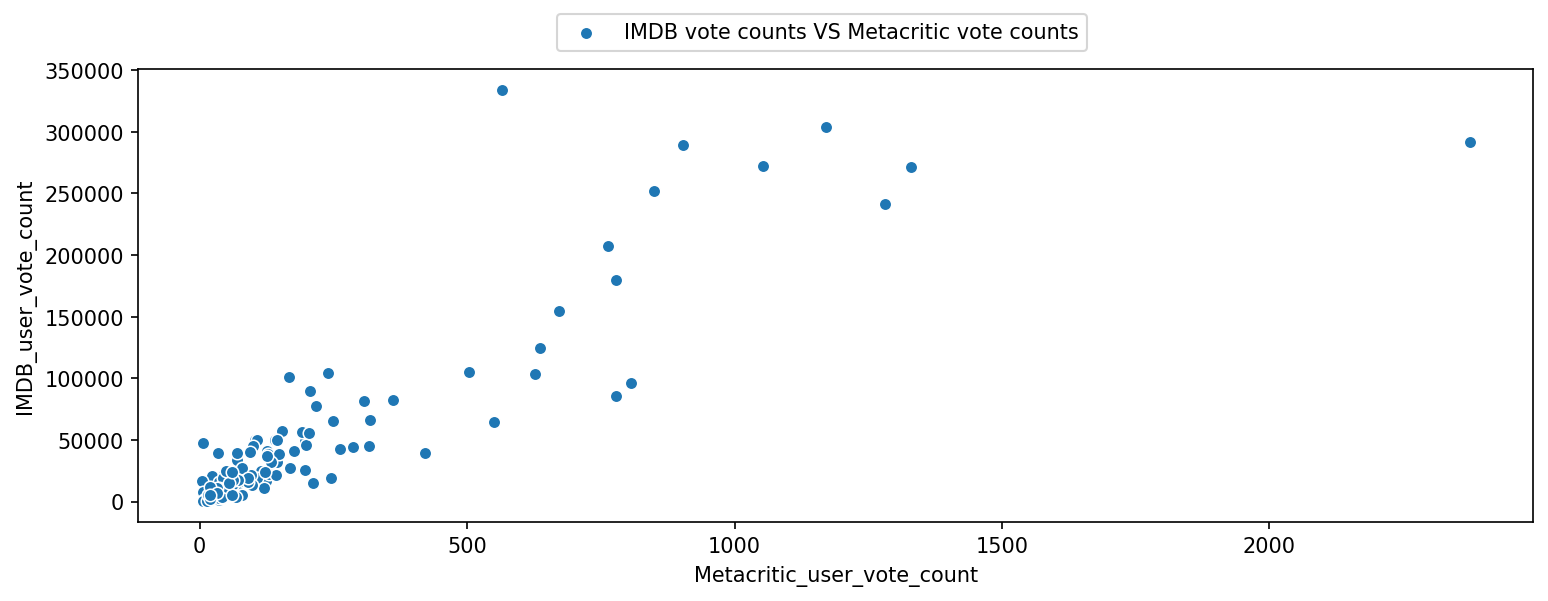

In [148]:
# What we are cheking here is are there movies which are more popular in IMDB website for rating or more on metacritic website 

plt.figure(figsize=(12,4),dpi=150)
sns.scatterplot(data=all_sites,x=all_sites['Metacritic_user_vote_count'],y=all_sites['IMDB_user_vote_count'],label='IMDB vote counts VS Metacritic vote counts')
plt.legend(loc=(0.3,1.04))

# two points which are outliers.
# lets explore these two points . Where imdb is pretty high and meta is little low
# one movie seems to be very high on both imdb and meta
# lets explore.



<font color='green'><b>


**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?**

**What movie has the highest IMDB user vote count?**
</b></font>

In [149]:

all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**What movie has the highest Metacritic User Vote count?**

In [150]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

<font color='green'><b>
**Combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so do an *inner* merge to merge together both DataFrames based on the FILM columns.**
</b></font>


In [151]:
fandango.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR'], dtype='object')

In [152]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'Rotten_Diff'],
      dtype='object')

In [153]:
# We want a merge where movies are present in both the dataframe fandango and all_sites. inner merge

df=pd.merge(fandango,all_sites,on='FILM',how='inner')
df


,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


### Normalize columns to Fandango STARS and RATINGS 0-5 

<font color='green'><b>
Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

**Lets Create new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango. There are many ways to do this.**

* 100/20 = 5 
* 10/2 = 5
</b></font>


In [155]:
# Let NORMALIZED the rating such that it falls between the range 0-5

df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [156]:
import numpy as np

df['RT_NORM']=np.round(df['RottenTomatoes']/20,1)
df['RTU__NORM']=np.round(df['RottenTomatoes_User']/20,1)
df['META_NORM']=np.round(df['Metacritic']/20,1)
df['META_U_NORM']=np.round(df['Metacritic_User']/2,1)
df['IMDB_NORM']=np.round(df['IMDB']/2,1)



In [85]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_NORM,RTU__NORM,META_NORM,META_U_NORM,IMDB_NORM
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [162]:
df_tab=df[['FILM','STARS','RATING','VOTES','RT_NORM', 'RTU__NORM', 'META_NORM', 'META_U_NORM', 'IMDB_NORM','YEAR','Metacritic_user_vote_count','IMDB_user_vote_count']]

In [163]:
df_tab['RT_DIFF']=df_tab['RT_NORM'] - df_tab['RTU__NORM']

<ipython-input-163-f5b0de860b6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tab['RT_DIFF']=df_tab['RT_NORM'] - df_tab['RTU__NORM']


In [164]:
df_tab['META_DIFF']=df_tab['META_NORM'] - df_tab['META_U_NORM']

<ipython-input-164-25bd6c99e838>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tab['META_DIFF']=df_tab['META_NORM'] - df_tab['META_U_NORM']


In [167]:
df_tab['F_diff']=df_tab['STARS'] - df_tab['RATING']

<ipython-input-167-99e4080a7f5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tab['F_diff']=df_tab['STARS'] - df_tab['RATING']


In [169]:
df_tab

,FILM,STARS,RATING,VOTES,RT_NORM,RTU__NORM,META_NORM,META_U_NORM,IMDB_NORM,YEAR,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,META_DIFF,F_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,1.2,2.1,2.3,1.6,2.1,2015,778,179506,-0.9,0.7,0.1
1,Jurassic World (2015),4.5,4.5,34390,3.6,4.0,3.0,3.5,3.6,2015,1281,241807,-0.4,-0.5,0.0
2,American Sniper (2015),5.0,4.8,34085,3.6,4.2,3.6,3.3,3.7,2015,850,251856,-0.6,0.3,0.2
3,Furious 7 (2015),5.0,4.8,33538,4.0,4.2,3.4,3.4,3.7,2015,764,207211,-0.2,0.0,0.2
4,Inside Out (2015),4.5,4.5,15749,4.9,4.5,4.7,4.4,4.3,2015,807,96252,0.4,0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,4.4,3.2,3.4,3.2,3.4,2015,19,5289,1.2,0.2,0.0
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,4.8,4.0,4.4,3.2,3.5,2015,18,1107,0.8,1.2,0.4
142,The Wrecking Crew (2015),4.5,4.2,38,4.6,4.2,3.4,3.5,3.9,2015,4,732,0.4,-0.1,0.3
143,Tangerine (2015),4.0,3.9,36,4.8,4.3,4.3,3.6,3.7,2015,14,696,0.5,0.7,0.1


In [170]:
df_tab.to_excel(r'C:\Users\renud\2021 Python DataScience\UNZIP_ME_FOR_NOTEBOOKS\06-Capstone-Project\Tableau_files_here\all_sites_Review.xlsx')

<font color='green'><b>
**Now create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.**
</b></font>



In [305]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RT_NORM', 'RTU__NORM', 'META_NORM', 'META_U_NORM', 'IMDB_NORM'],
      dtype='object')

In [306]:
# Grab all the fandango columns


norm_scores=df[['STARS','RATING','RT_NORM', 'RTU__NORM', 'META_NORM', 'META_U_NORM', 'IMDB_NORM']]
norm_scores.head()

# all score between 0-5

# we know that fandango is showing website 'STAR' rating more than actual website user 'RATING'.

# But lets see how other sites have rated the same movies which Fandango has rated higher.

,STARS,RATING,RT_NORM,RTU__NORM,META_NORM,META_U_NORM,IMDB_NORM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites

<font color='green'><b>
**Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?**
</b></font>





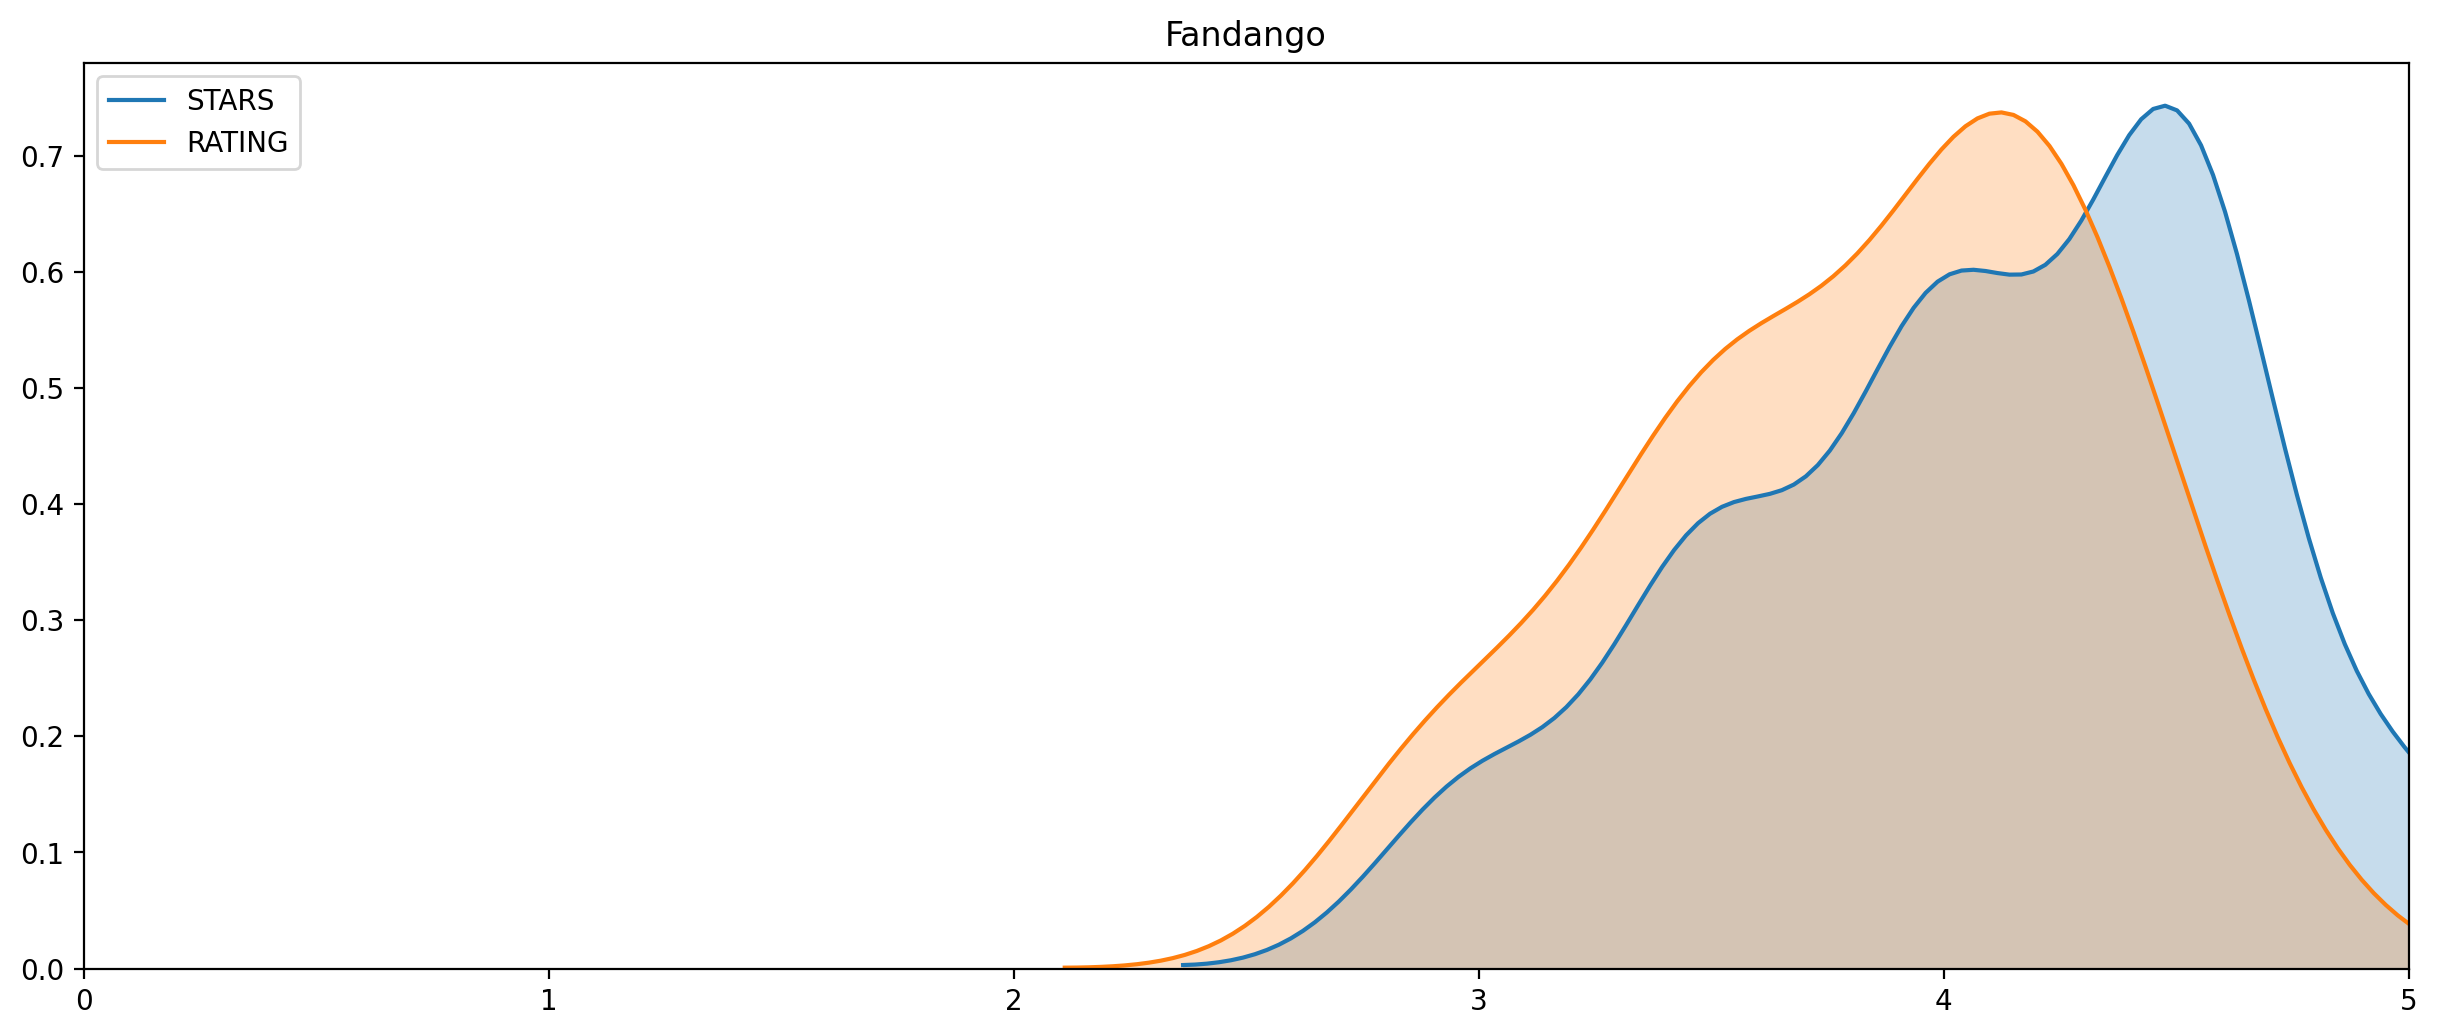

In [307]:
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(norm_scores['STARS'],shade=True)
sns.kdeplot(norm_scores['RATING'],shade=True)
plt.title('Fandango')
plt.xlim(0,5);

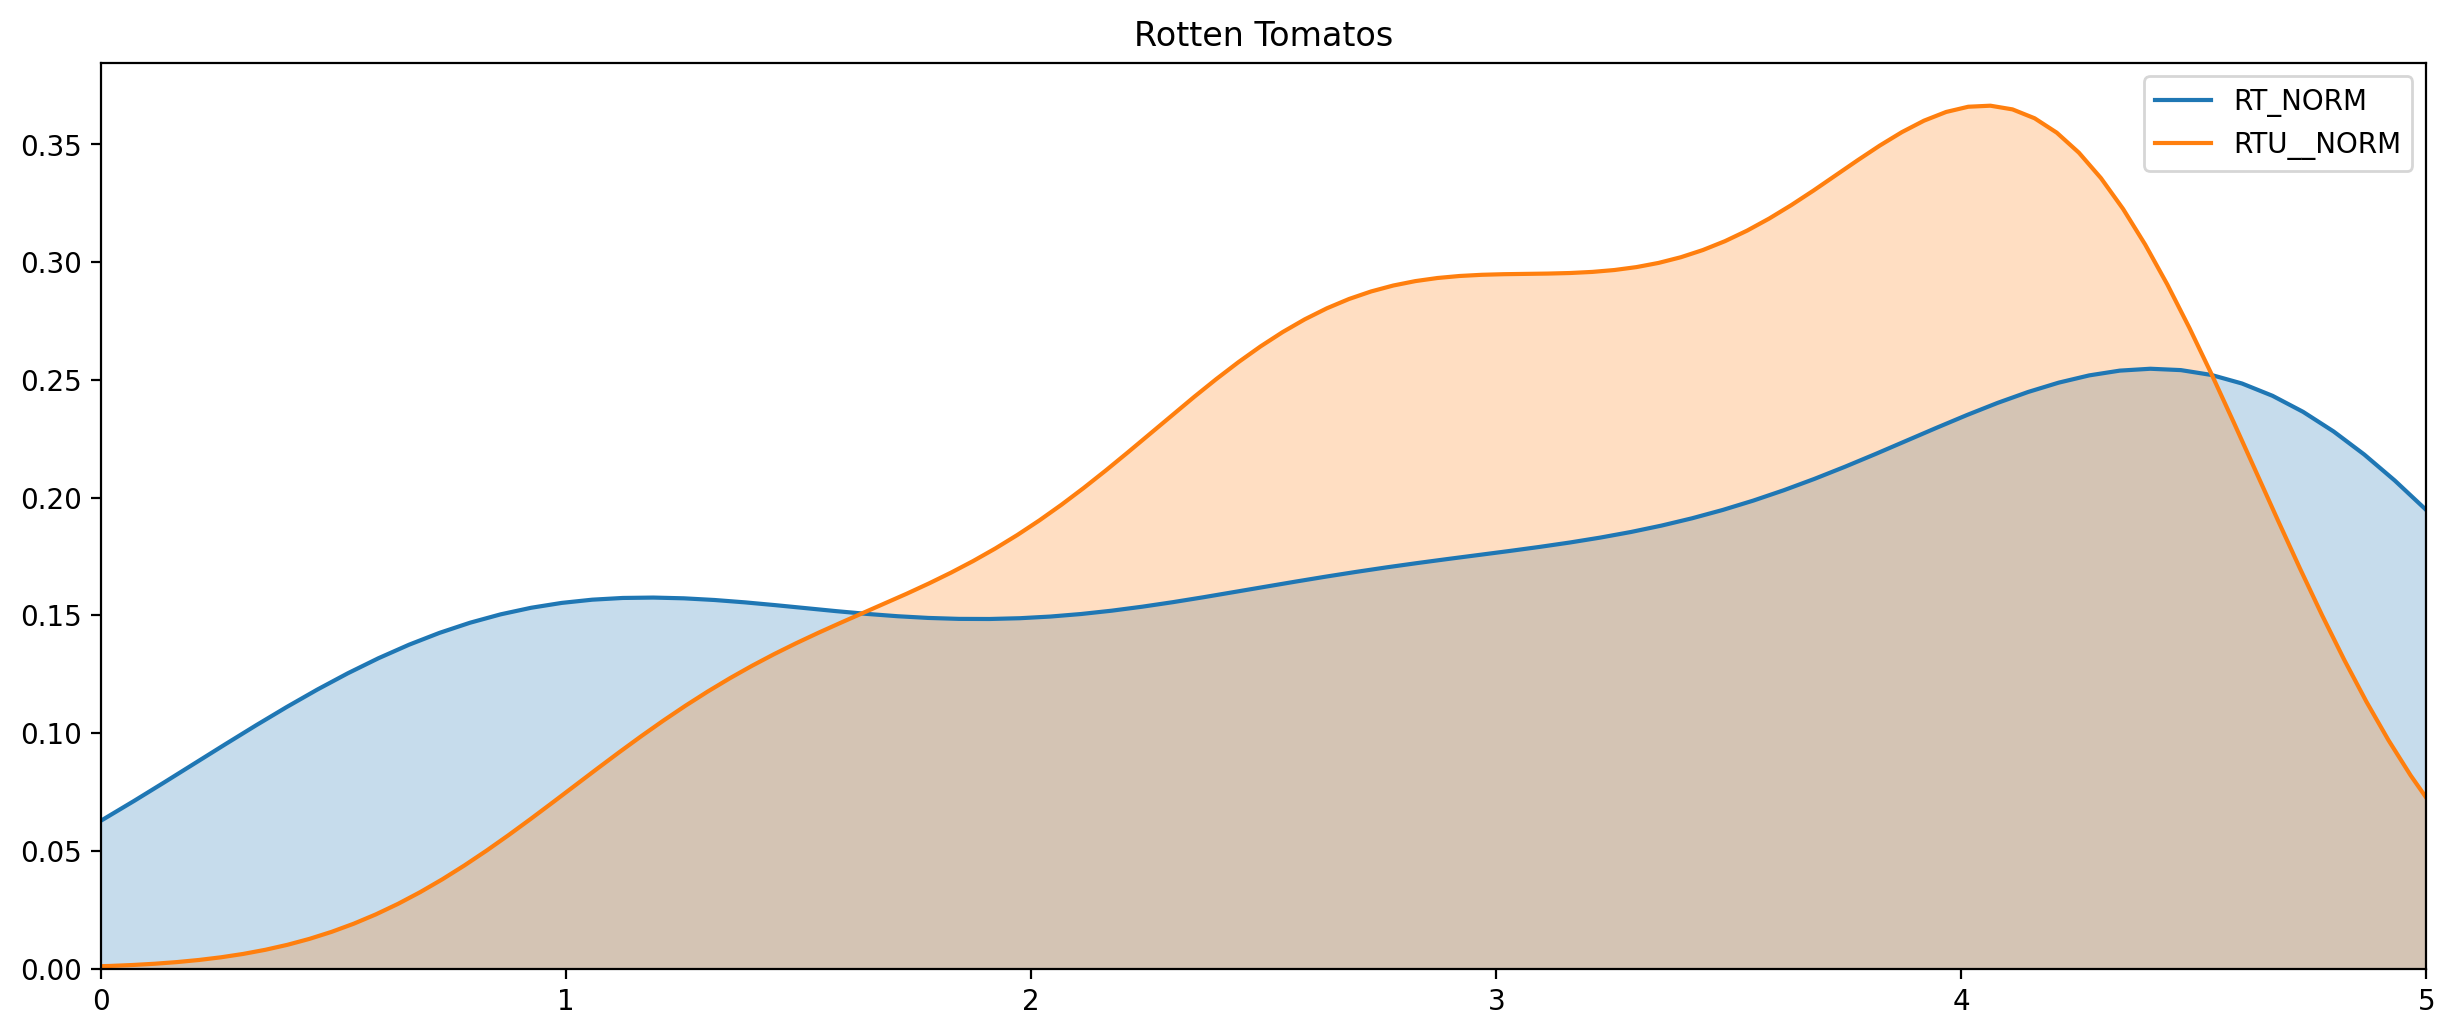

In [308]:
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(norm_scores['RT_NORM'],shade=True)
sns.kdeplot(norm_scores['RTU__NORM'],shade=True)

plt.title('Rotten Tomatos')
plt.xlim(0,5);

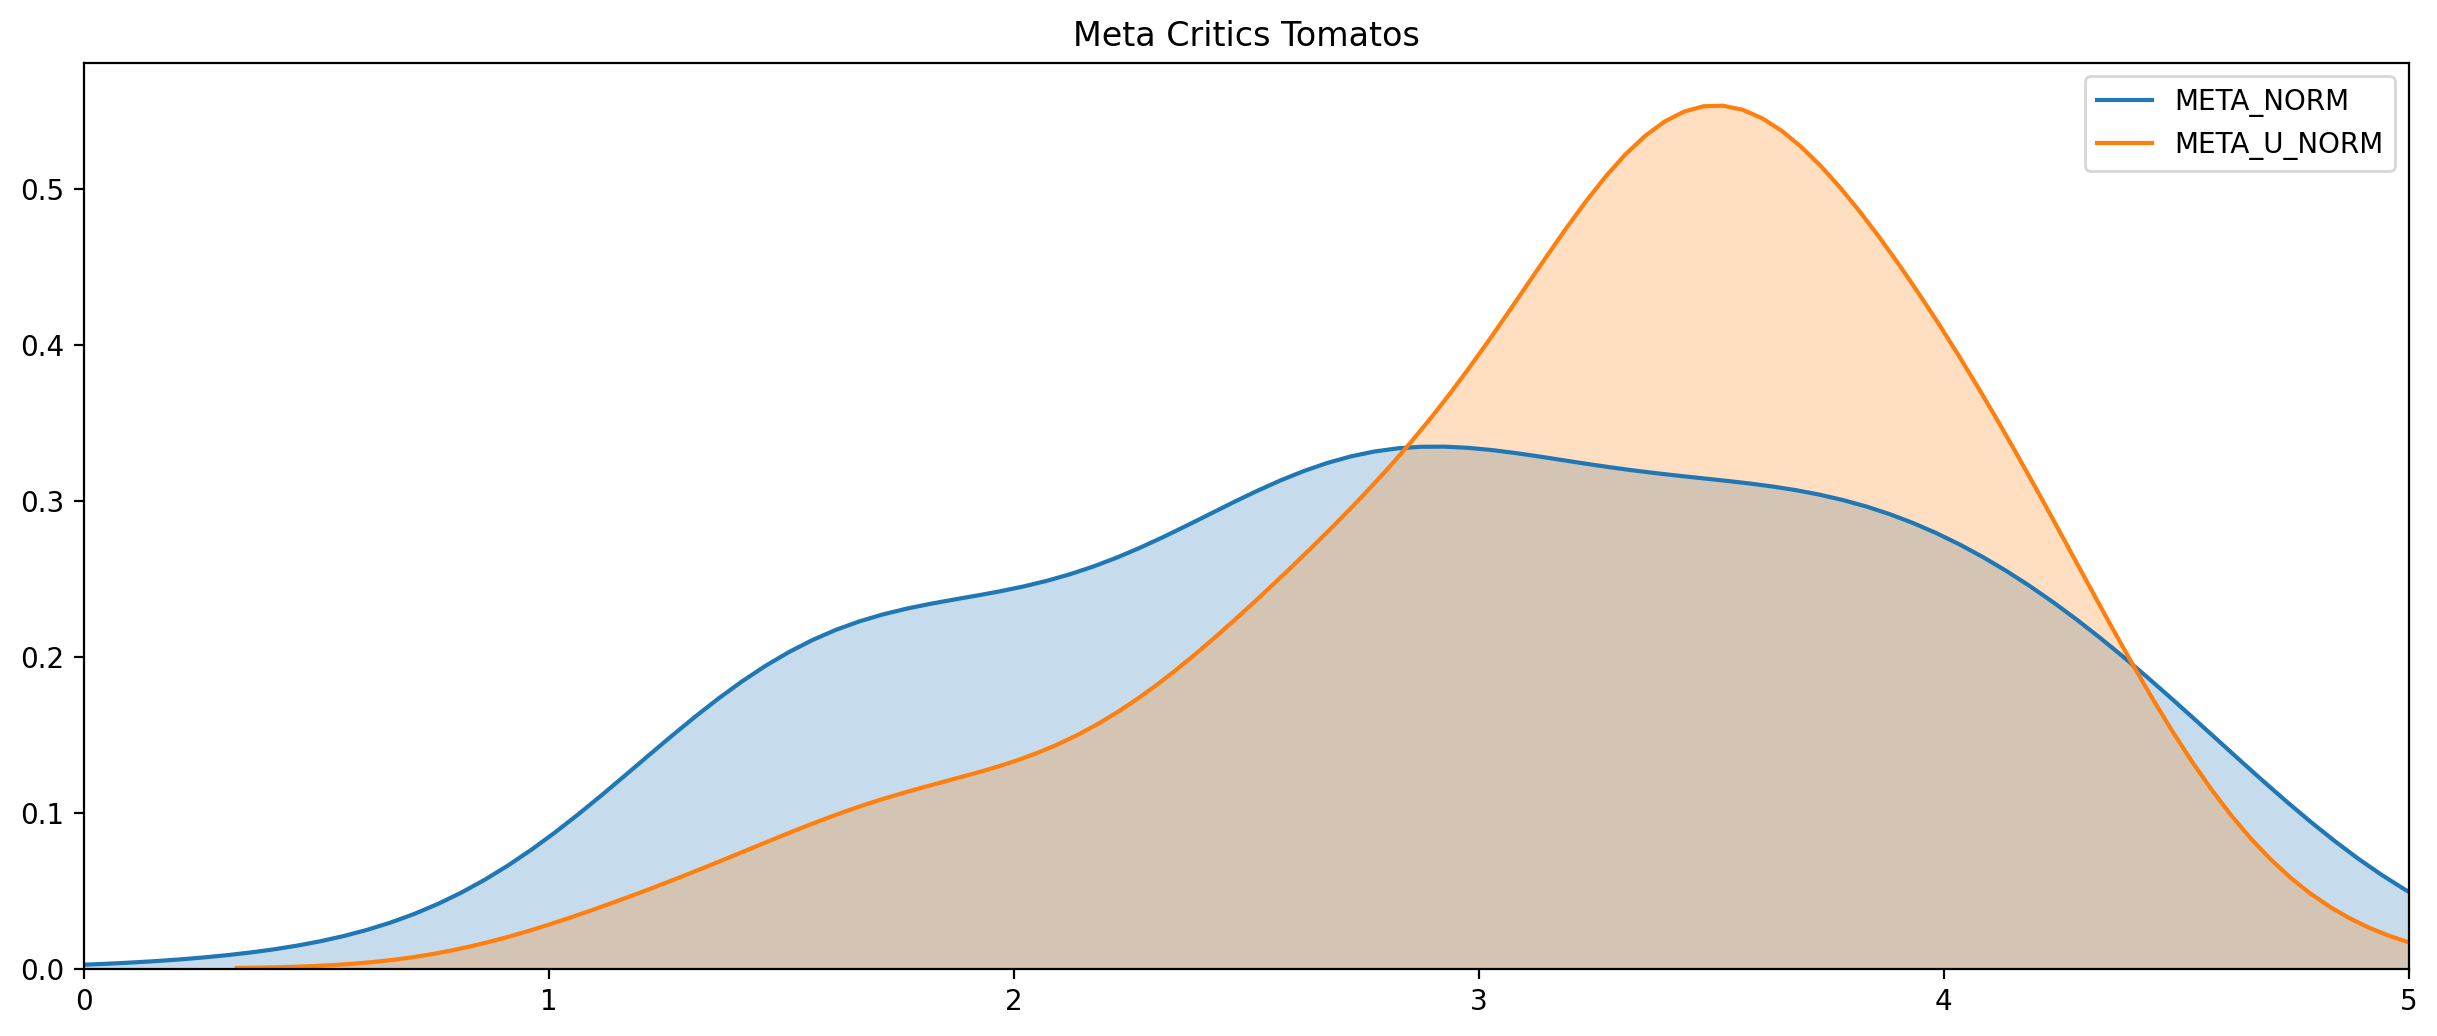

In [309]:
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(norm_scores['META_NORM'],shade=True)
sns.kdeplot(norm_scores['META_U_NORM'],shade=True)
plt.title('Meta Critics Tomatos')
plt.xlim(0,5);

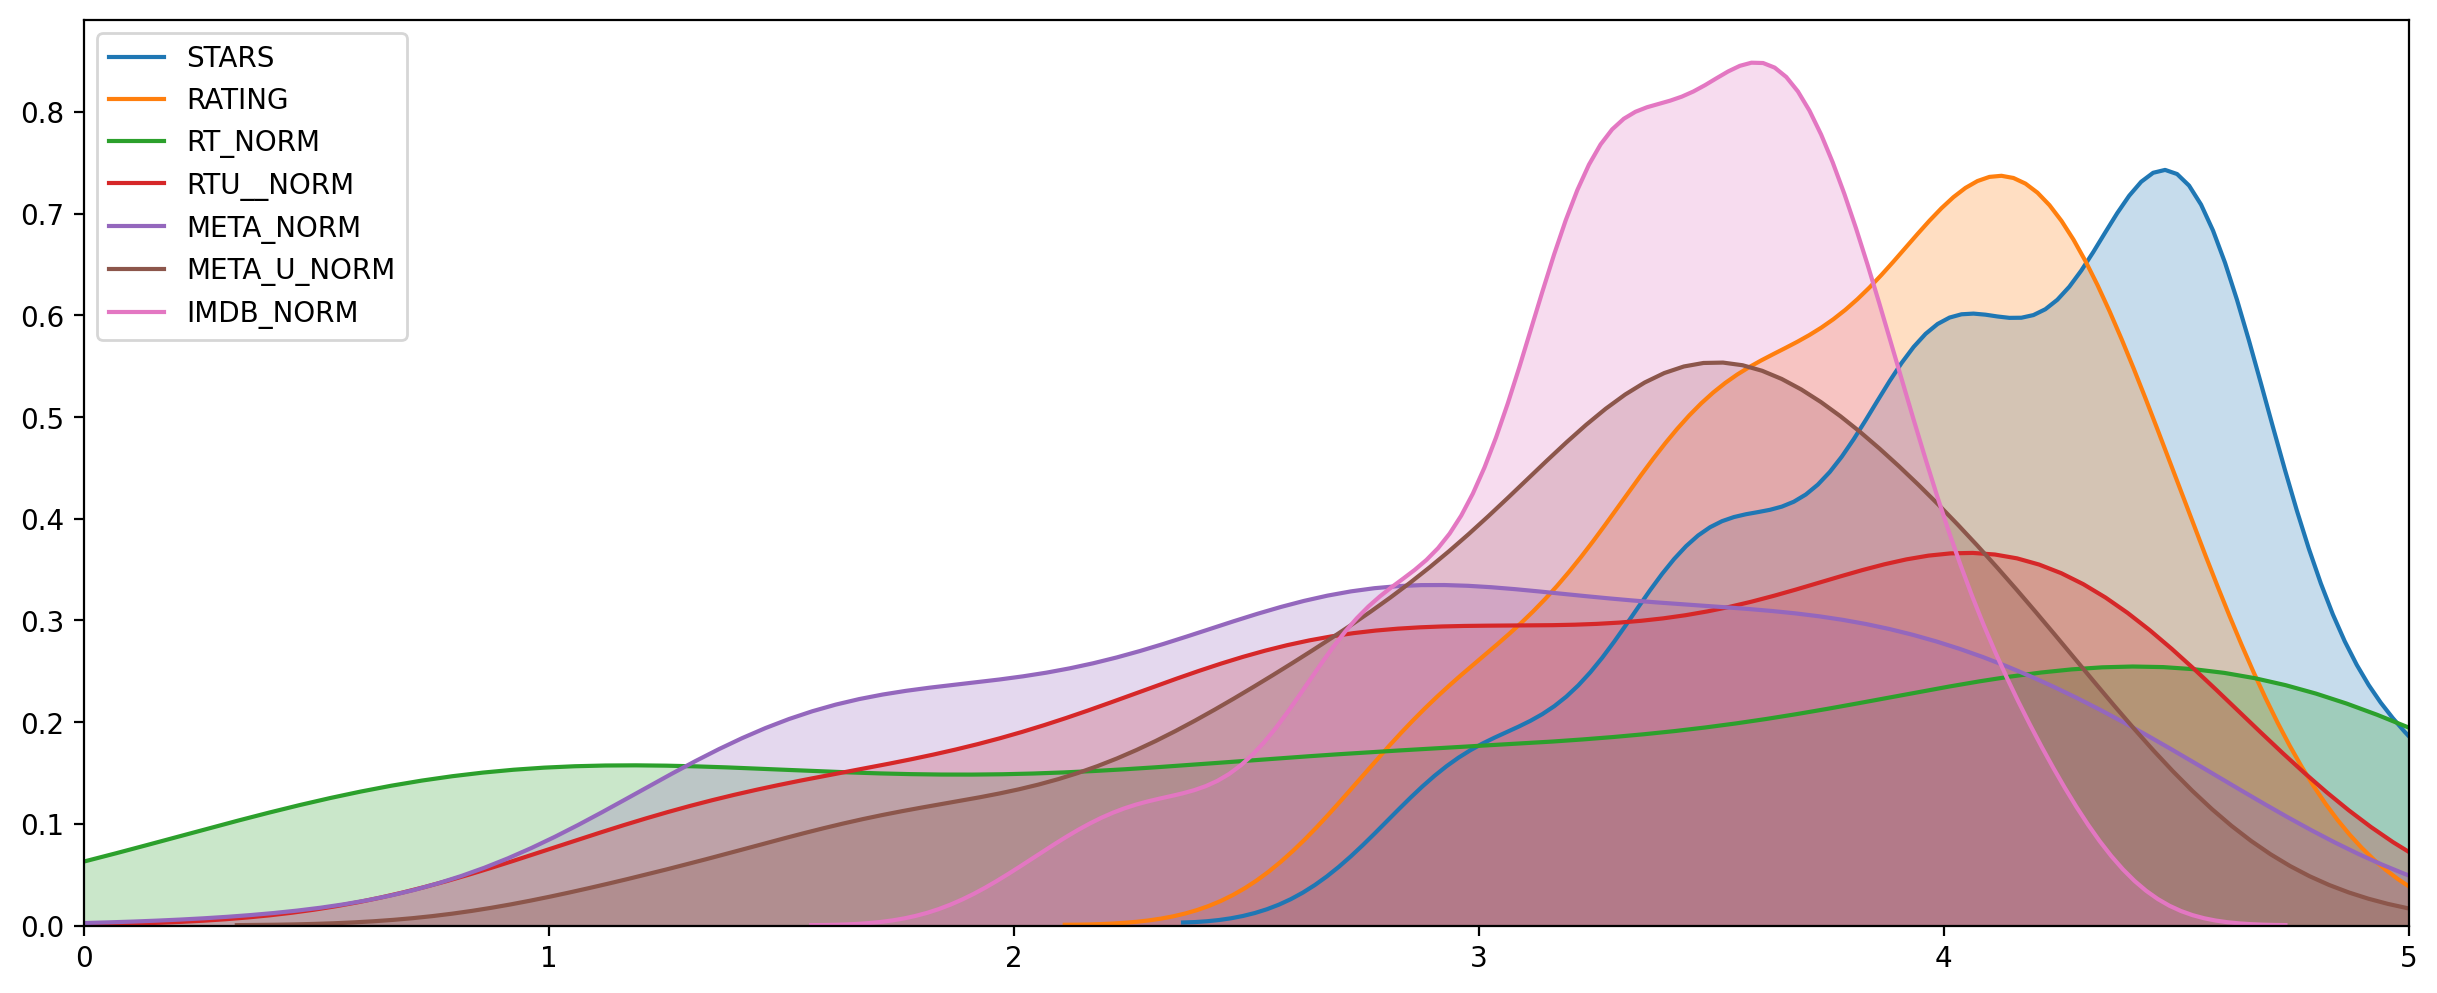

In [310]:
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(norm_scores['STARS'],shade=True)
sns.kdeplot(norm_scores['RATING'],shade=True)
sns.kdeplot(norm_scores['RT_NORM'],shade=True)
sns.kdeplot(norm_scores['RTU__NORM'],shade=True)
sns.kdeplot(norm_scores['META_NORM'],shade=True)
sns.kdeplot(norm_scores['META_U_NORM'],shade=True)
sns.kdeplot(norm_scores['IMDB_NORM'],shade=True)
plt.xlim(0,5);





So clearly we can see the fandango STARS/RATING both are skewed to left or are highier. 'STAR' is skewed highier, more than 'RATING'
IMDB is the most centrally distributed.
Fandango is definetly rating movies highier on there websites.


Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.

Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.

<font color='green'><b>
**Website Rating comparison between RT and fandango**
</b></font>

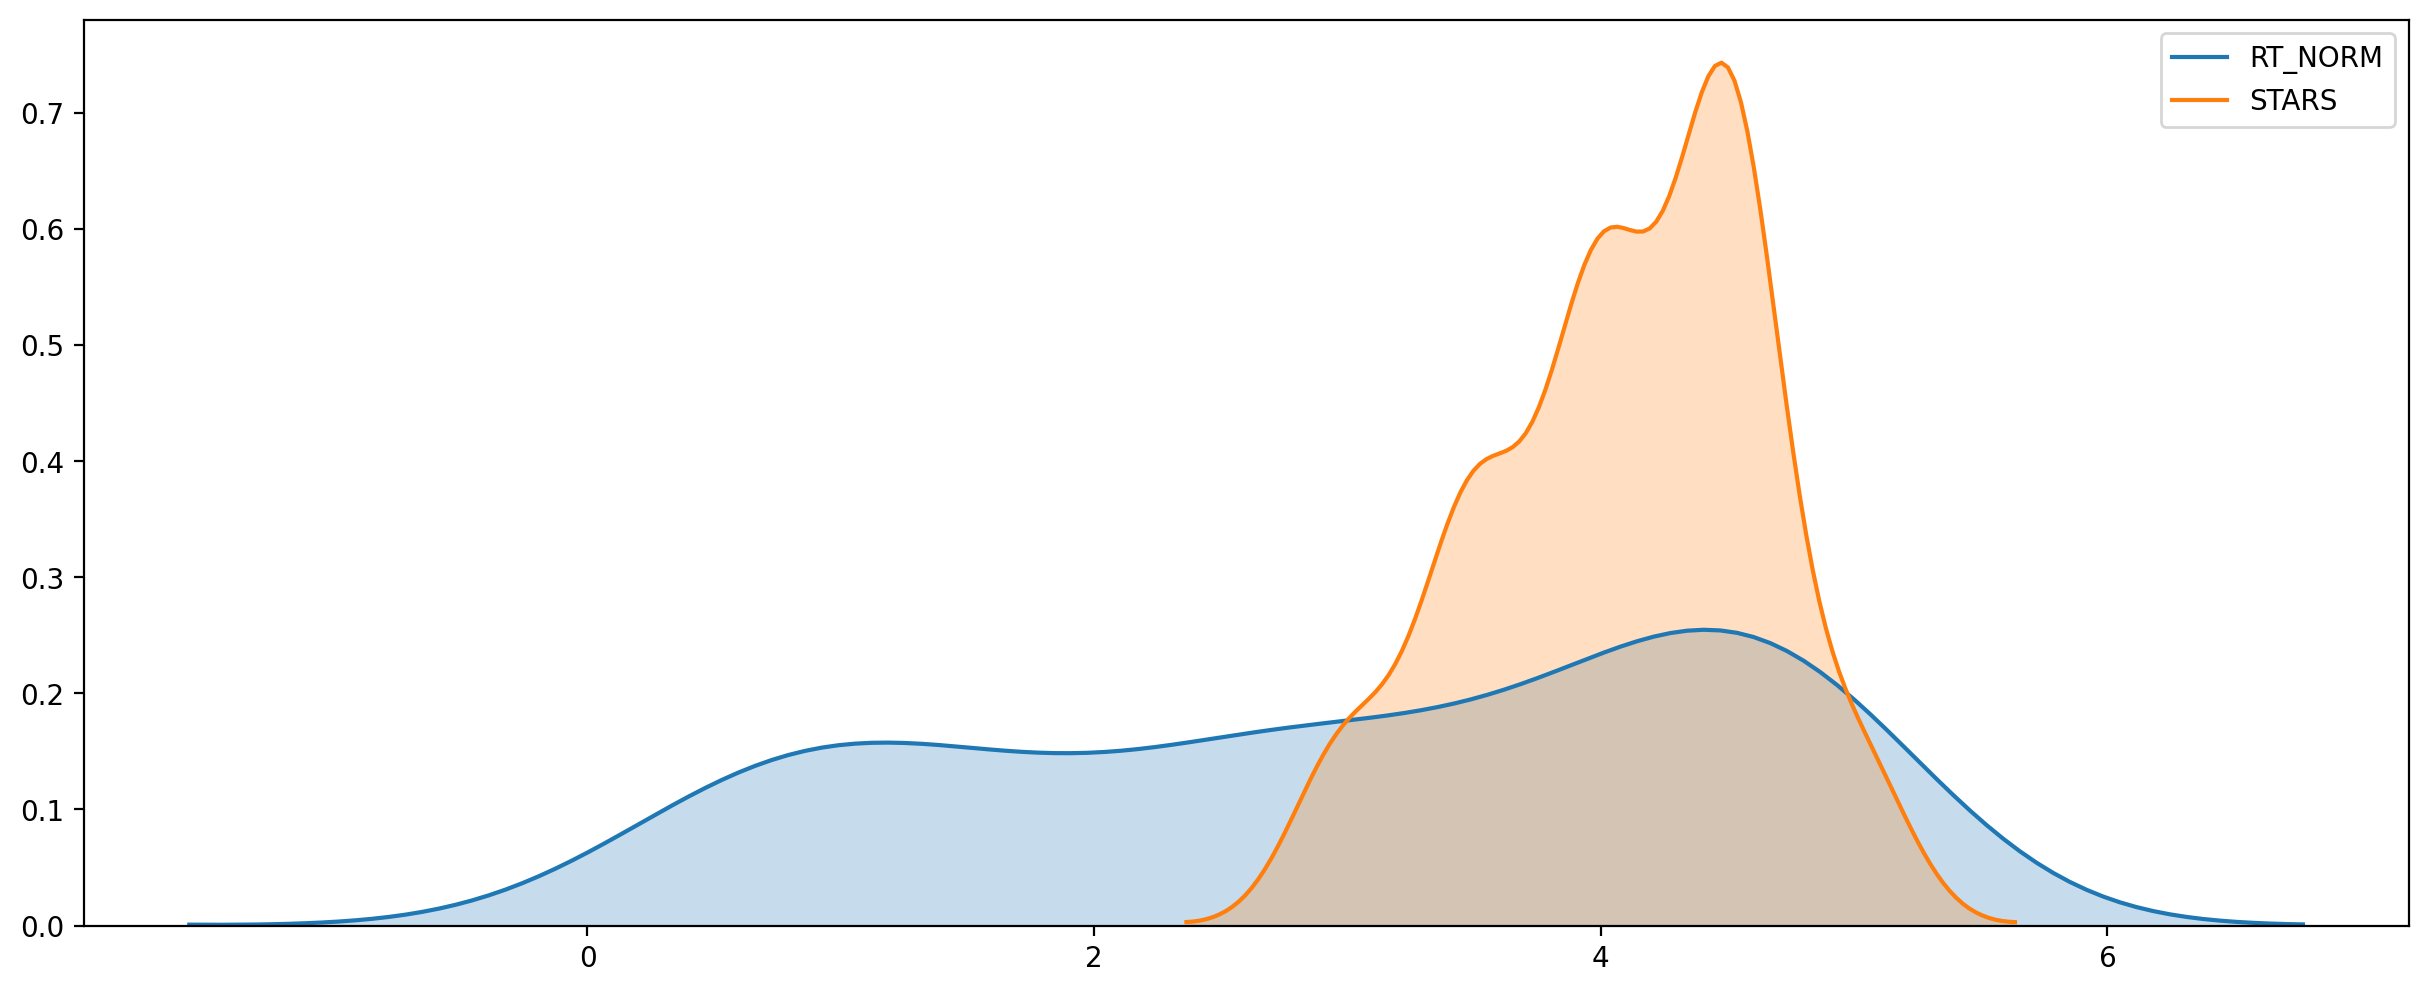

In [311]:
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(df['RT_NORM'],shade=True)
sns.kdeplot(df['STARS'],shade=True)



# SAME movie rated on fadango is much highier than rotten tomatoes website rating 


### How are the worst movies rated across all platforms?

<font color='green'><b>
**Creating a clustermap visualization of all normalized scores.**
</b></font>

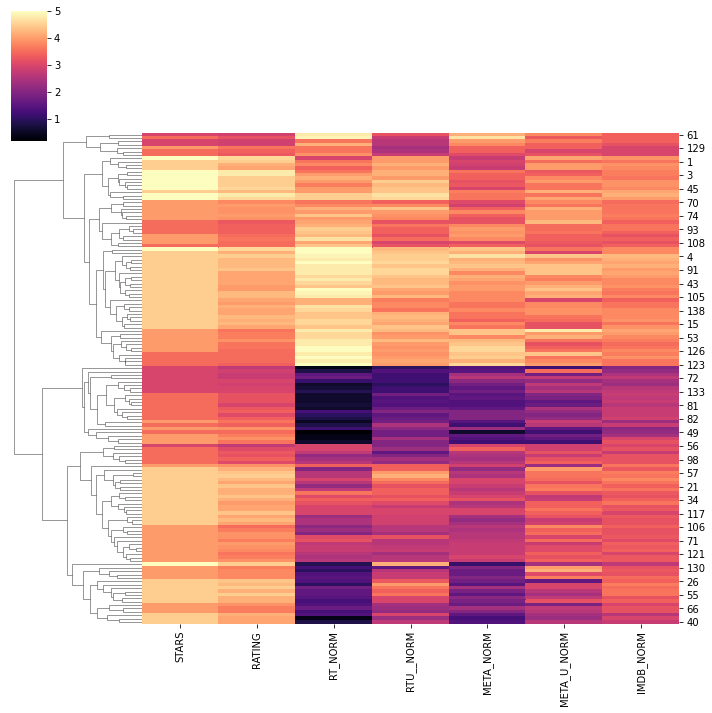

In [312]:
sns.clustermap(norm_scores,cmap='magma',col_cluster=False)


# Its clustering movie together based on there movies across all sites. That means if the movie is really bad all sites should be rating that movie bad aproximately.
# Dark purple are bad movies. Light one are good movies.
# In general the RT seems to be the harshest in rating the movies.
# patches of purple are kind of normalized among all critic other than fandango.
# Even the bad rated movies which has darker shades in other critics are lighter in color in fandango star ratings  .

<font color='green'><b>
**Clearly Fandango is rating movies much higher than other sites,  Let's examine the top 10 worst movies. Based off Taking average of all movies and then from the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? .**
</b></font>



In [313]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_NORM,RTU__NORM,META_NORM,META_U_NORM,IMDB_NORM
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [314]:
norm_scores.head()

,STARS,RATING,RT_NORM,RTU__NORM,META_NORM,META_U_NORM,IMDB_NORM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


In [200]:
norm_films= df[['FILM','VOTES','STARS', 'RATING', 'RT_NORM', 'RTU__NORM', 'META_NORM', 'META_U_NORM','IMDB_NORM']]
norm_films.head()

,FILM,VOTES,STARS,RATING,RT_NORM,RTU__NORM,META_NORM,META_U_NORM,IMDB_NORM
0,Fifty Shades of Grey (2015),34846,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),34390,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),34085,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),33538,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),15749,4.5,4.5,4.9,4.5,4.7,4.4,4.3


In [201]:
norm_films['AVG']=(norm_films['RT_NORM']+norm_films['RTU__NORM']+norm_films['META_NORM']+norm_films['META_U_NORM']+norm_films['IMDB_NORM'])/5

<ipython-input-201-b12db63f4eaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_films['AVG']=(norm_films['RT_NORM']+norm_films['RTU__NORM']+norm_films['META_NORM']+norm_films['META_U_NORM']+norm_films['IMDB_NORM'])/5


In [203]:
norm_films

,FILM,VOTES,STARS,RATING,RT_NORM,RTU__NORM,META_NORM,META_U_NORM,IMDB_NORM,AVG
0,Fifty Shades of Grey (2015),34846,4.0,3.9,1.2,2.1,2.3,1.6,2.1,1.86
1,Jurassic World (2015),34390,4.5,4.5,3.6,4.0,3.0,3.5,3.6,3.54
2,American Sniper (2015),34085,5.0,4.8,3.6,4.2,3.6,3.3,3.7,3.68
3,Furious 7 (2015),33538,5.0,4.8,4.0,4.2,3.4,3.4,3.7,3.74
4,Inside Out (2015),15749,4.5,4.5,4.9,4.5,4.7,4.4,4.3,4.56
...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",41,3.5,3.5,4.4,3.2,3.4,3.2,3.4,3.52
141,The Diary of a Teenage Girl (2015),38,4.0,3.6,4.8,4.0,4.4,3.2,3.5,3.98
142,The Wrecking Crew (2015),38,4.5,4.2,4.6,4.2,3.4,3.5,3.9,3.92
143,Tangerine (2015),36,4.0,3.9,4.8,4.3,4.3,3.6,3.7,4.14


In [204]:
norm_films['STAR - AVG']=norm_films['STARS']-norm_films['AVG']
norm_films.nlargest(10,'STAR - AVG')


<ipython-input-204-d4085ebbd545>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_films['STAR - AVG']=norm_films['STARS']-norm_films['AVG']


,FILM,VOTES,STARS,RATING,RT_NORM,RTU__NORM,META_NORM,META_U_NORM,IMDB_NORM,AVG,STAR - AVG
67,Do You Believe? (2015),1793,5.0,4.5,0.9,4.2,1.1,2.4,2.7,2.26,2.74
25,Taken 3 (2015),6757,4.5,4.1,0.4,2.3,1.3,2.3,3.0,1.86,2.64
40,Pixels (2015),3886,4.5,4.1,0.8,2.7,1.4,2.6,2.8,2.06,2.44
54,Hot Pursuit (2015),2618,4.0,3.7,0.4,1.8,1.6,1.8,2.4,1.60,2.40
88,The Loft (2015),811,4.0,3.6,0.6,2.0,1.2,1.2,3.2,1.64,2.36
24,Annie (2014),6835,4.5,4.2,1.4,3.0,1.6,2.4,2.6,2.20,2.30
49,Paul Blart: Mall Cop 2 (2015),3054,3.5,3.5,0.2,1.8,0.6,1.2,2.2,1.20,2.30
84,Hitman: Agent 47 (2015),917,4.0,3.9,0.4,2.4,1.4,1.6,3.0,1.76,2.24
50,The Boy Next Door (2015),2800,4.0,3.6,0.5,1.8,1.5,2.8,2.3,1.78,2.22
26,The Wedding Ringer (2015),6506,4.5,4.4,1.4,3.3,1.8,1.6,3.4,2.30,2.20


In [212]:
worst_films=norm_films.nsmallest(10,'RT_NORM')  # ACC. to rotten tomatos these are the 10 worst movies.


In [216]:
worst_films['STARS - RT_WEB']=worst_films['STARS']-worst_films['RT_NORM']

In [218]:
worst_films.sort_values('STARS - RT_WEB',ascending=False)

,FILM,VOTES,STARS,RATING,RT_NORM,RTU__NORM,META_NORM,META_U_NORM,IMDB_NORM,STARS - RT_WEB
25,Taken 3 (2015),6757,4.5,4.1,0.4,2.3,1.3,2.3,3.0,4.1
54,Hot Pursuit (2015),2618,4.0,3.7,0.4,1.8,1.6,1.8,2.4,3.6
84,Hitman: Agent 47 (2015),917,4.0,3.9,0.4,2.4,1.4,1.6,3.0,3.6
50,The Boy Next Door (2015),2800,4.0,3.6,0.5,1.8,1.5,2.8,2.3,3.5
49,Paul Blart: Mall Cop 2 (2015),3054,3.5,3.5,0.2,1.8,0.6,1.2,2.2,3.3
77,Seventh Son (2015),1213,3.5,3.2,0.6,1.8,1.5,2.0,2.8,2.9
78,Mortdecai (2015),1196,3.5,3.2,0.6,1.5,1.4,1.6,2.8,2.9
83,Sinister 2 (2015),973,3.5,3.3,0.6,1.7,1.6,2.5,2.8,2.9
87,Unfinished Business (2015),821,3.5,3.2,0.6,1.4,1.6,1.9,2.7,2.9
28,Fantastic Four (2015),6288,3.0,2.7,0.4,1.0,1.4,1.2,2.0,2.6


**Visualize the distribution of ratings across all sites for the top 10 worst movies.**

In [221]:
worst_films=worst_films.drop(['VOTES','STARS - RT_WEB'],axis=1)

<Figure size 3000x1200 with 0 Axes>

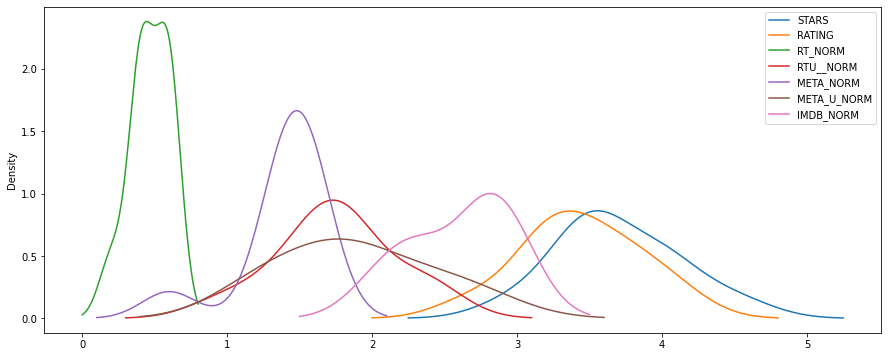

In [222]:
plt.figure(figsize=(15,6),dpi=200)
worst_films.plot.kde(figsize=(15,6))


# plt.figure(figsize=(15,6),dpi=200)
# sns.kdeplot(worst_films['STARS'],shade=True)
# sns.kdeplot(worst_films['RATING'],shade=True)
# sns.kdeplot(worst_films['RT_NORM'],shade=True)
# sns.kdeplot(worst_films['RTU__NORM'],shade=True)
# # sns.kdeplot(worst_films['META_NORM'],shade=True)
# sns.kdeplot(worst_films['META_U_NORM'],shade=True)
# sns.kdeplot(worst_films['IMDB_NORM'],shade=True)





<font color='green'><b>
These are the distibution of 10 worst movie and the distribution of fandango websites ratings ('STAR') is still centralized between 3 to 4 
</b></font>


---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

In [253]:
worst_films

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                   3
FILM           Taken 3 (2015)
Name: 25, dtype: object

In [254]:
0.4+2.3+1.3+2.3+3

9.3

In [255]:
9.3/5

1.86

----

<font color='green'><b>
Is Fandango rating the movie high in 2016 also?
Lets try to find out with a limited dataset I found in Data.world/Github.The file movie_ratings_16_17.csv contains movie rating 214 most popular movie with significant number of votes released in 2016 and 2017.
</b></font>


<img src="https://user-images.githubusercontent.com/44217560/49028148-b7d86c00-f1c7-11e8-9870-8a5bbae62830.PNG">

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
fandango_2016_17=pd.read_csv('fandango_2016.csv')

In [7]:
fandango_2016_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [8]:
fandango_2016_17['FILM']=fandango_2016_17['movie'] +" " + fandango_2016_17['year'].astype(str)

In [9]:
fandango_2016_17.columns

Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience', 'FILM'],
      dtype='object')

In [11]:
fandango_2016_17=fandango_2016_17[['FILM','fandango', 'nr_audience','n_audience','nr_metascore','nr_imdb','year']]
fandango_2016_17.columns = ['FILM', 'FADANGO_USER', 'ROTTEN_TOM', 'ROTTEN_TOM_User', 'METACRITIC','IMDB','YEAR']

In [12]:
fandango_2016_17['Rotten_diff']=fandango_2016_17['ROTTEN_TOM']-fandango_2016_17['ROTTEN_TOM_User']

In [13]:
fandango_2016_17.nlargest(15,'Rotten_diff')  # critic liked more

,FILM,FADANGO_USER,ROTTEN_TOM,ROTTEN_TOM_User,METACRITIC,IMDB,YEAR,Rotten_diff
22,Ben-Hur 2016,4.0,3.0,2.75,2.0,3.0,2016,0.25
87,Keanu 2016,4.0,3.0,2.75,3.0,3.0,2016,0.25
91,Kong: Skull Island 2017,4.0,4.0,3.75,3.0,3.5,2017,0.25
132,Pete's Dragon 2016,4.5,4.0,3.75,3.5,3.5,2016,0.25
168,The Confirmation 2016,4.5,3.0,2.75,3.0,3.0,2016,0.25
203,Underworld: Blood Wars 2016,4.0,3.0,2.75,1.0,3.0,2016,0.25
207,Whiskey Tango Foxtrot 2016,3.5,3.0,2.75,3.0,3.5,2016,0.25
3,A Dog's Purpose 2017,4.5,4.0,3.80,2.0,2.5,2017,0.20
8,Allied 2016,4.0,3.5,3.30,3.0,3.5,2016,0.20
19,Beauty and the Beast 2017,4.5,4.5,4.30,3.0,4.0,2017,0.20


In [14]:
fandango_2016_17.nsmallest(15,'Rotten_diff') # User liked more

,FILM,FADANGO_USER,ROTTEN_TOM,ROTTEN_TOM_User,METACRITIC,IMDB,YEAR,Rotten_diff
15,Bad Moms 2016,4.5,3.0,3.25,3.0,3.0,2016,-0.25
20,Before I Fall 2017,3.5,3.0,3.25,3.0,3.0,2017,-0.25
32,Captain Fantastic 2016,4.0,4.0,4.25,3.5,4.0,2016,-0.25
42,Dirty Grandpa 2016,3.5,2.0,2.25,1.0,3.0,2016,-0.25
55,Finding Dory 2016,4.5,4.0,4.25,4.0,3.5,2016,-0.25
59,Genius 2016,3.5,2.0,2.25,3.0,3.0,2016,-0.25
64,Gold 2016,3.5,2.0,2.25,2.5,3.5,2016,-0.25
74,I.T. 2016,3.5,1.0,1.25,1.5,2.5,2016,-0.25
120,Neighbors 2: Sorority Rising 2016,3.5,2.0,2.25,3.0,3.0,2016,-0.25
134,Pride and Prejudice and Zombies 2016,4.0,2.0,2.25,2.0,3.0,2016,-0.25


In [15]:
fandango_2016_17

,FILM,FADANGO_USER,ROTTEN_TOM,ROTTEN_TOM_User,METACRITIC,IMDB,YEAR,Rotten_diff
0,10 Cloverfield Lane 2016,3.5,4.0,3.95,4.0,3.5,2016,0.05
1,13 Hours 2016,4.5,4.0,4.15,2.5,3.5,2016,-0.15
2,A Cure for Wellness 2016,3.0,2.5,2.35,2.5,3.5,2016,0.15
3,A Dog's Purpose 2017,4.5,4.0,3.80,2.0,2.5,2017,0.20
4,A Hologram for the King 2016,3.0,3.0,2.85,3.0,3.0,2016,0.15
...,...,...,...,...,...,...,...,...
209,X-Men: Apocalypse 2016,4.0,3.5,3.35,2.5,3.5,2016,0.15
210,XX 2017,3.0,1.0,0.85,3.0,2.5,2017,0.15
211,xXx: Return of Xander Cage 2017,4.0,2.0,2.25,2.0,2.5,2017,-0.25
212,Zoolander 2 2016,2.5,1.0,1.05,1.5,2.5,2016,-0.05


In [16]:
norm_scores=fandango_2016_17[['FADANGO_USER', 'ROTTEN_TOM', 'ROTTEN_TOM_User', 'METACRITIC','IMDB']]

<font color='green'><b>
**Lets Visualize the count of movies per year with a plot:**
</b></font>


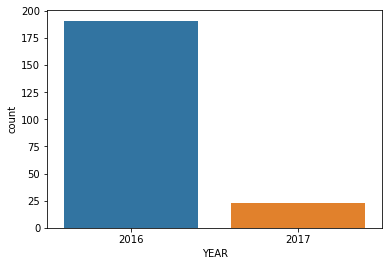

In [17]:
sns.countplot(data=fandango_2016_17,x='YEAR')

<font color='green'><b>
Scatter plot between Rotten tomato website rating  and  user ratings
</b></font>


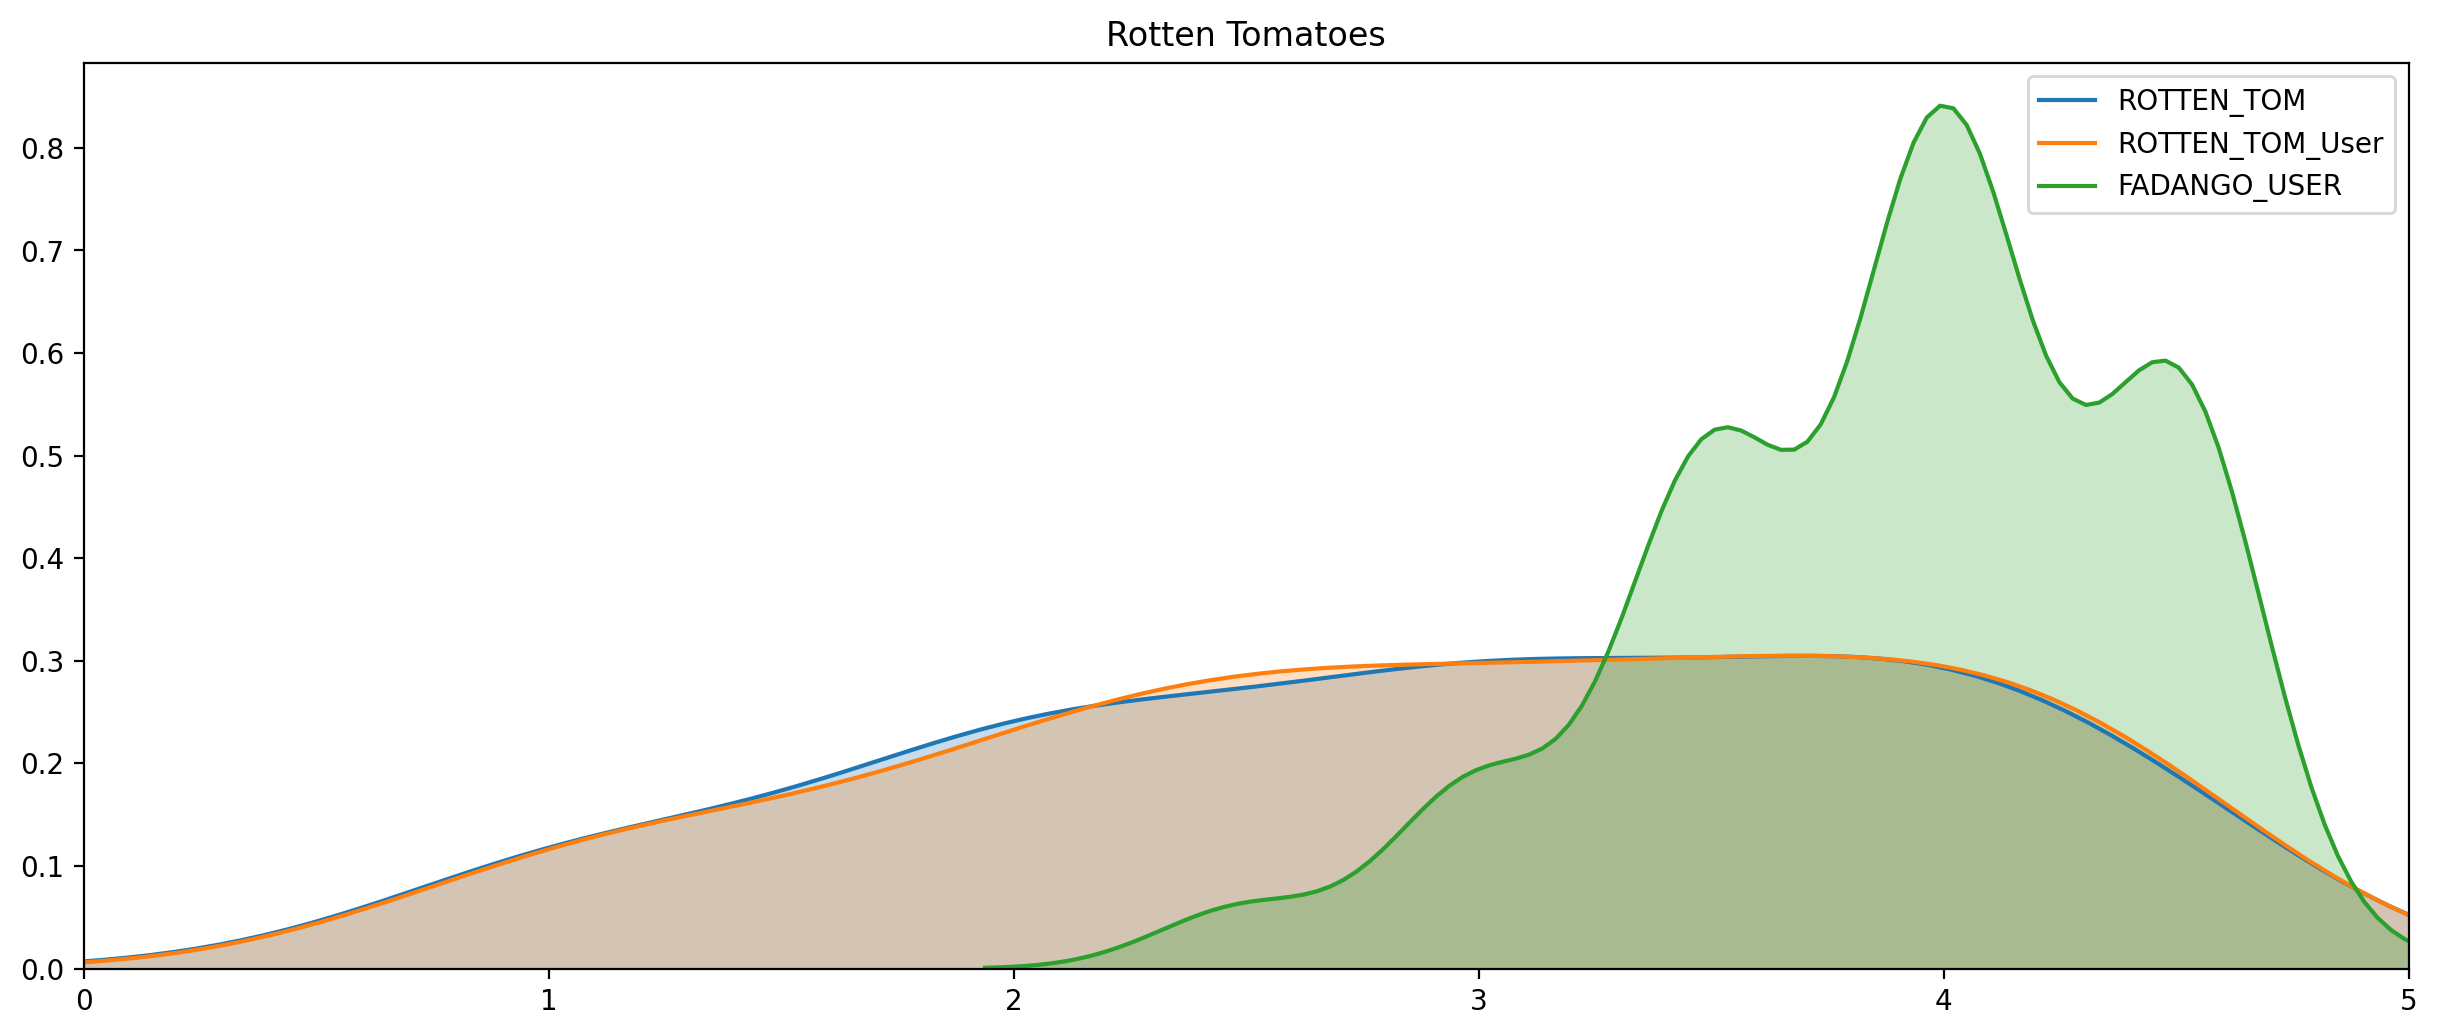

In [18]:
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(norm_scores['ROTTEN_TOM'],shade=True)
sns.kdeplot(norm_scores['ROTTEN_TOM_User'],shade=True)
sns.kdeplot(norm_scores['FADANGO_USER'],shade=True)
plt.title('Rotten Tomatoes')
plt.xlim(0,5);

<font color='green'><b>
We suddendly see that rotten tomatoes have become more generous in giving good ratings to the movie.And the distribution difference between the rotten tomatoes website rating and user rating is very low. 
The Fandango User rating is still skewed towards higher end of rating and unfortunetly we dont have Fandango's website rating available to dig more    
</b></font>


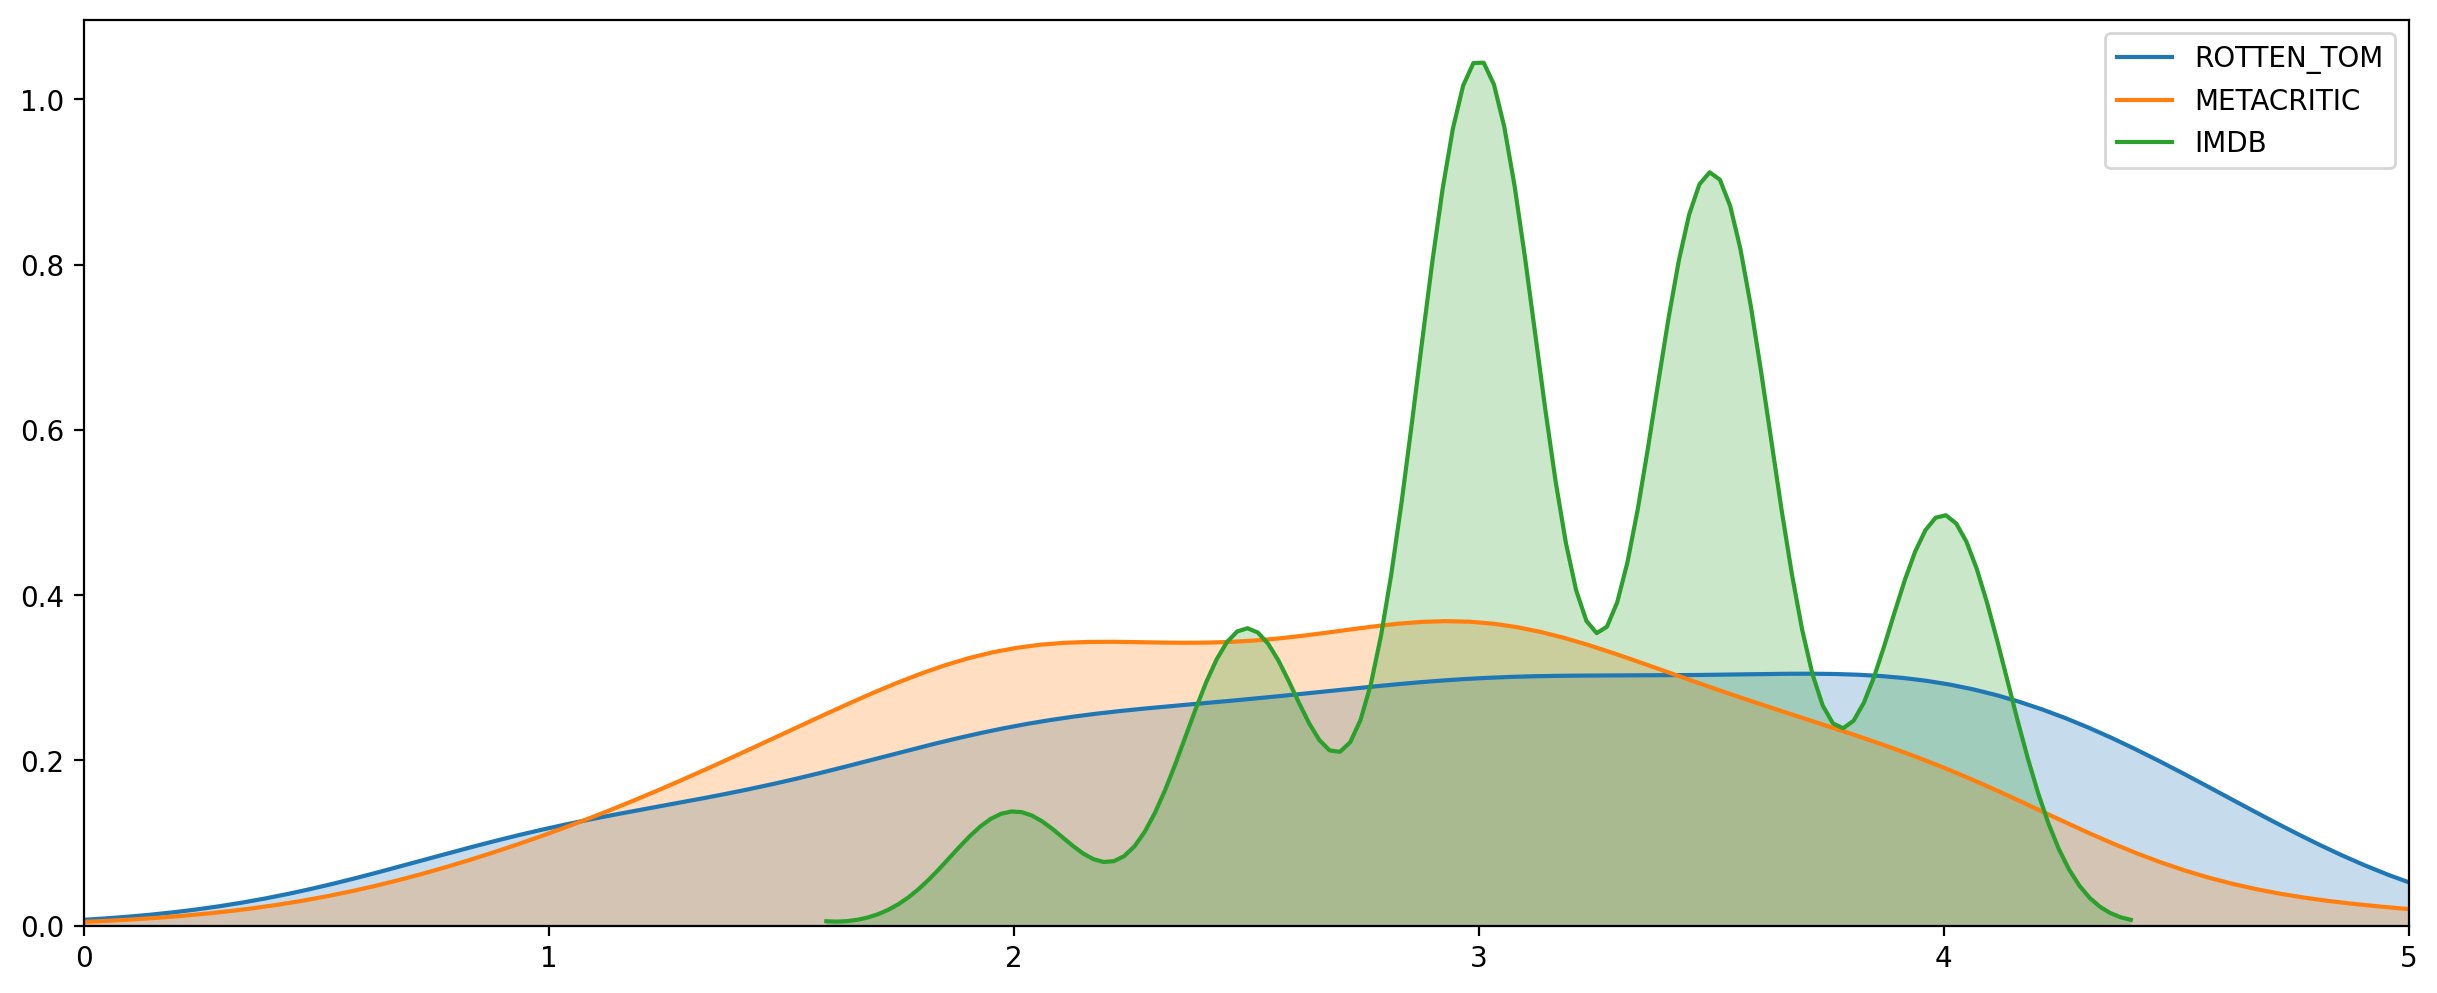

In [19]:
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(fandango_2016_17['ROTTEN_TOM'],shade=True)
sns.kdeplot(fandango_2016_17['METACRITIC'],shade=True)
sns.kdeplot(fandango_2016_17['IMDB'],shade=True)
plt.xlim(0,5);

<font color='green'><b>
When we compare the distribution of available website ratings between all sites in 2016-2017 amomg Metacritic,Rotten tomatoes and IMDB we find,IMDB is centralized its rating between 3 -4 whereas Rotten tomatoes is pretty much uniformly distributed.  
</b></font>

In [21]:
fandango_2016_17.columns

Index(['FILM', 'FADANGO_USER', 'ROTTEN_TOM', 'ROTTEN_TOM_User', 'METACRITIC',
       'IMDB', 'YEAR', 'Rotten_diff'],
      dtype='object')

In [22]:
Best_films=fandango_2016_17.nlargest(10,'ROTTEN_TOM')

In [23]:
Worst_films=fandango_2016_17.nsmallest(10,'ROTTEN_TOM')

In [27]:
Best_films.head(100)

,FILM,FADANGO_USER,ROTTEN_TOM,ROTTEN_TOM_User,METACRITIC,IMDB,YEAR,Rotten_diff
19,Beauty and the Beast 2017,4.5,4.5,4.30,3.0,4.0,2017,0.20
28,Busanhaeng 2016,4.5,4.5,4.40,3.5,4.0,2016,0.10
31,Captain America: Civil War 2016,4.5,4.5,4.45,4.0,4.0,2016,0.05
40,Deadpool 2016,4.5,4.5,4.50,3.0,4.0,2016,0.00
43,Doctor Strange 2016,4.5,4.5,4.35,3.5,4.0,2016,0.15
61,Get Out 2017,4.5,4.5,4.45,4.0,4.0,2017,0.05
65,Hacksaw Ridge 2016,4.5,4.5,4.60,3.5,4.0,2016,-0.10
68,Hell or High Water 2016,4.5,4.5,4.40,4.5,4.0,2016,0.10
69,Hidden Figures 2016,5.0,4.5,4.65,3.5,4.0,2016,-0.15
71,Hunt for the Wilderpeople 2016,4.5,4.5,4.55,4.0,4.0,2016,-0.05


In [25]:
Worst_films

,FILM,FADANGO_USER,ROTTEN_TOM,ROTTEN_TOM_User,METACRITIC,IMDB,YEAR,Rotten_diff
29,Cabin Fever 2016,4.0,0.5,0.55,0.5,2.0,2016,-0.05
50,Exposed 2016,2.5,0.5,0.65,1.0,2.0,2016,-0.15
11,Approaching the Unknown 2016,3.5,1.0,0.80,2.5,2.5,2016,0.20
13,Arsenal 2017,3.5,1.0,1.10,1.0,2.0,2017,-0.10
33,Cell 2016,3.0,1.0,0.80,2.0,2.0,2016,0.20
54,Fifty Shades of Black 2016,2.5,1.0,0.95,1.5,2.0,2016,0.05
60,Get a Job 2016,3.0,1.0,1.10,1.5,2.5,2016,-0.10
74,I.T. 2016,3.5,1.0,1.25,1.5,2.5,2016,-0.25
78,Incarnate 2016,3.0,1.0,1.10,1.5,2.5,2016,-0.10
112,Misconduct 2016,3.0,1.0,1.20,1.0,2.5,2016,-0.20


(0.0, 5.0)

<Figure size 3000x1200 with 0 Axes>

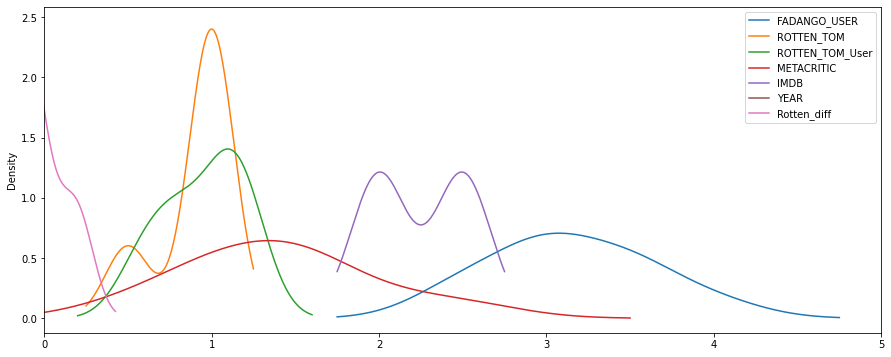

In [26]:
plt.figure(figsize=(15,6),dpi=200)
Worst_films.plot.kde(figsize=(15,6))
plt.xlim(0,5)

<font color='green'><b>
These are the 10 worst movies in rotten tomatoes clearly both website and user reviews are low. But the Fabdango's User are still showing higher ratings.This shows nothing changes in 2016.
Since in 2016 the Rotten tomatoes was acquired by Fandango we see the difference between Rotten tomatoes User and website ratings  became very less and uniformly ditributed.No one knows how they round up the movie rating but in 2016 movie seems to be faily rated.
</b></font>